In [39]:
import csv
import numpy as np
from math import sqrt, pi, sin, cos
import matplotlib.pyplot as plt
from numpy import linspace

#makes plots bigger and use Latex fonts
from matplotlib import rcParams
rcParams["figure.dpi"]=600
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2.5
rcParams['legend.framealpha'] = 1
rcParams['legend.edgecolor'] = 'k'

In [69]:
HBARC = 197.3269718
NEUTRON_MASS = 939.5653 / HBARC
PROTON_MASS = 938.272 / HBARC
NUCLEON_MASS = 2 * NEUTRON_MASS * PROTON_MASS / (NEUTRON_MASS + PROTON_MASS)
MUON_MASS = 105.7 / HBARC
ELECTRON_MASS = 0.511 / HBARC
GA = 1.267
MEVFM3_TO_GCM3 = 1.78e12
FM4_TO_DYNECM2 = 3.16e35
G_TO_FM = 7.69**2 / 10**16 / HBARC**2
COS_TC = sqrt(0.95)
GF = (HBARC / 292800)**2

CC_FACTOR = GF**2 * COS_TC**2 * 10**13
NC_FACTOR = GF**2 * 10**13

In [3]:
#results csvs have cc of the form
#mean of n, stddev of n, mean of p, stddev of p, n, ndegen, p, pdegen, eB, T, mun, n, yp, knu, cost, ui

cc_filenames = ['./opacity csvs/cc' + elt + '.csv' for elt in ['2', '3', '4', '5', '6']]

data_arr = np.empty((45, 16))
counter = 0
for filename in cc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            data_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

In [13]:
sorted_data[1, -3] * HBARC

np.float64(1.5163035189807588)

<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:23: SyntaxWarning: invalid escape sequence '\k'
<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:23: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/3334936114.py:13: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_428/3334936114.py:23: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-08, 0.001)

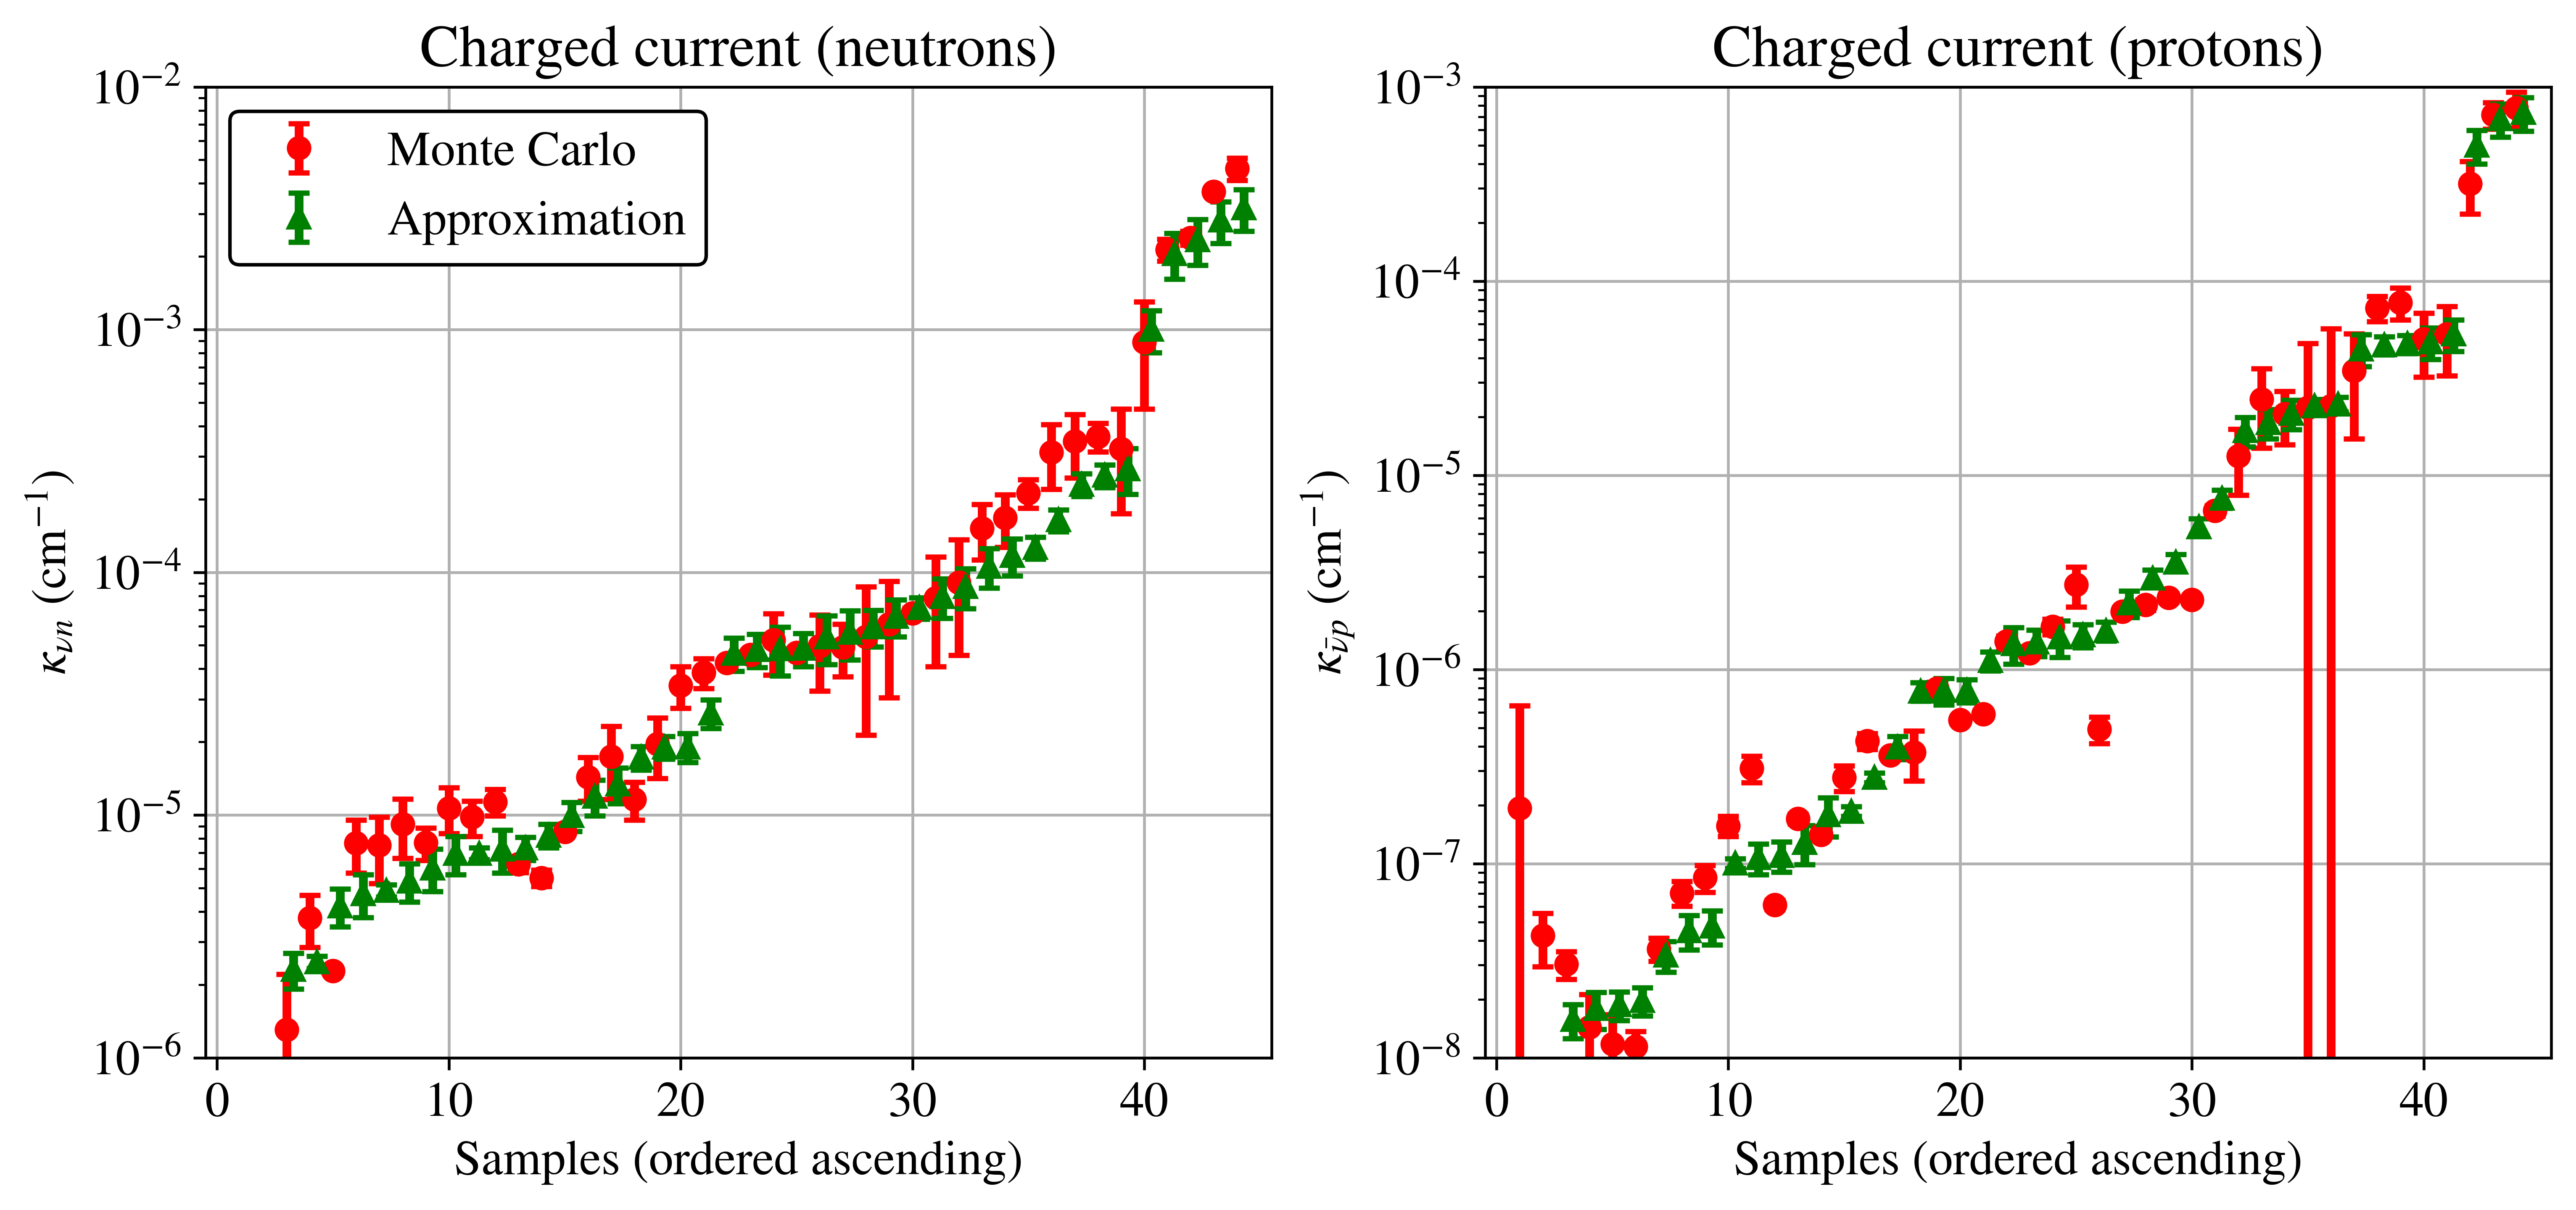

In [ ]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(45)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 4], np.sqrt(sorted_data[:, 9] / NUCLEON_MASS) * sorted_data[:, 4], fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(45) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 6], np.sqrt(sorted_data[:, 9] / NUCLEON_MASS) * sorted_data[:, 6], fmt = 'g^', capsize = 3, capthick = 1.5)
ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 45.5])
ax2.set_xlim([-0.5, 45.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Charged current (neutrons)')
ax2.set_title('Charged current (protons)')
ax1.set_ylim([1e-6, 1e-2])
ax2.set_ylim([1e-8, 1e-3])

<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_272/608072342.py:35: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_272/608072342.py:38: SyntaxWarning: invalid escape sequence '\k'
  plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_272/608072342.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.legend(['Neutrons', 'Protons'], title = '$\kap

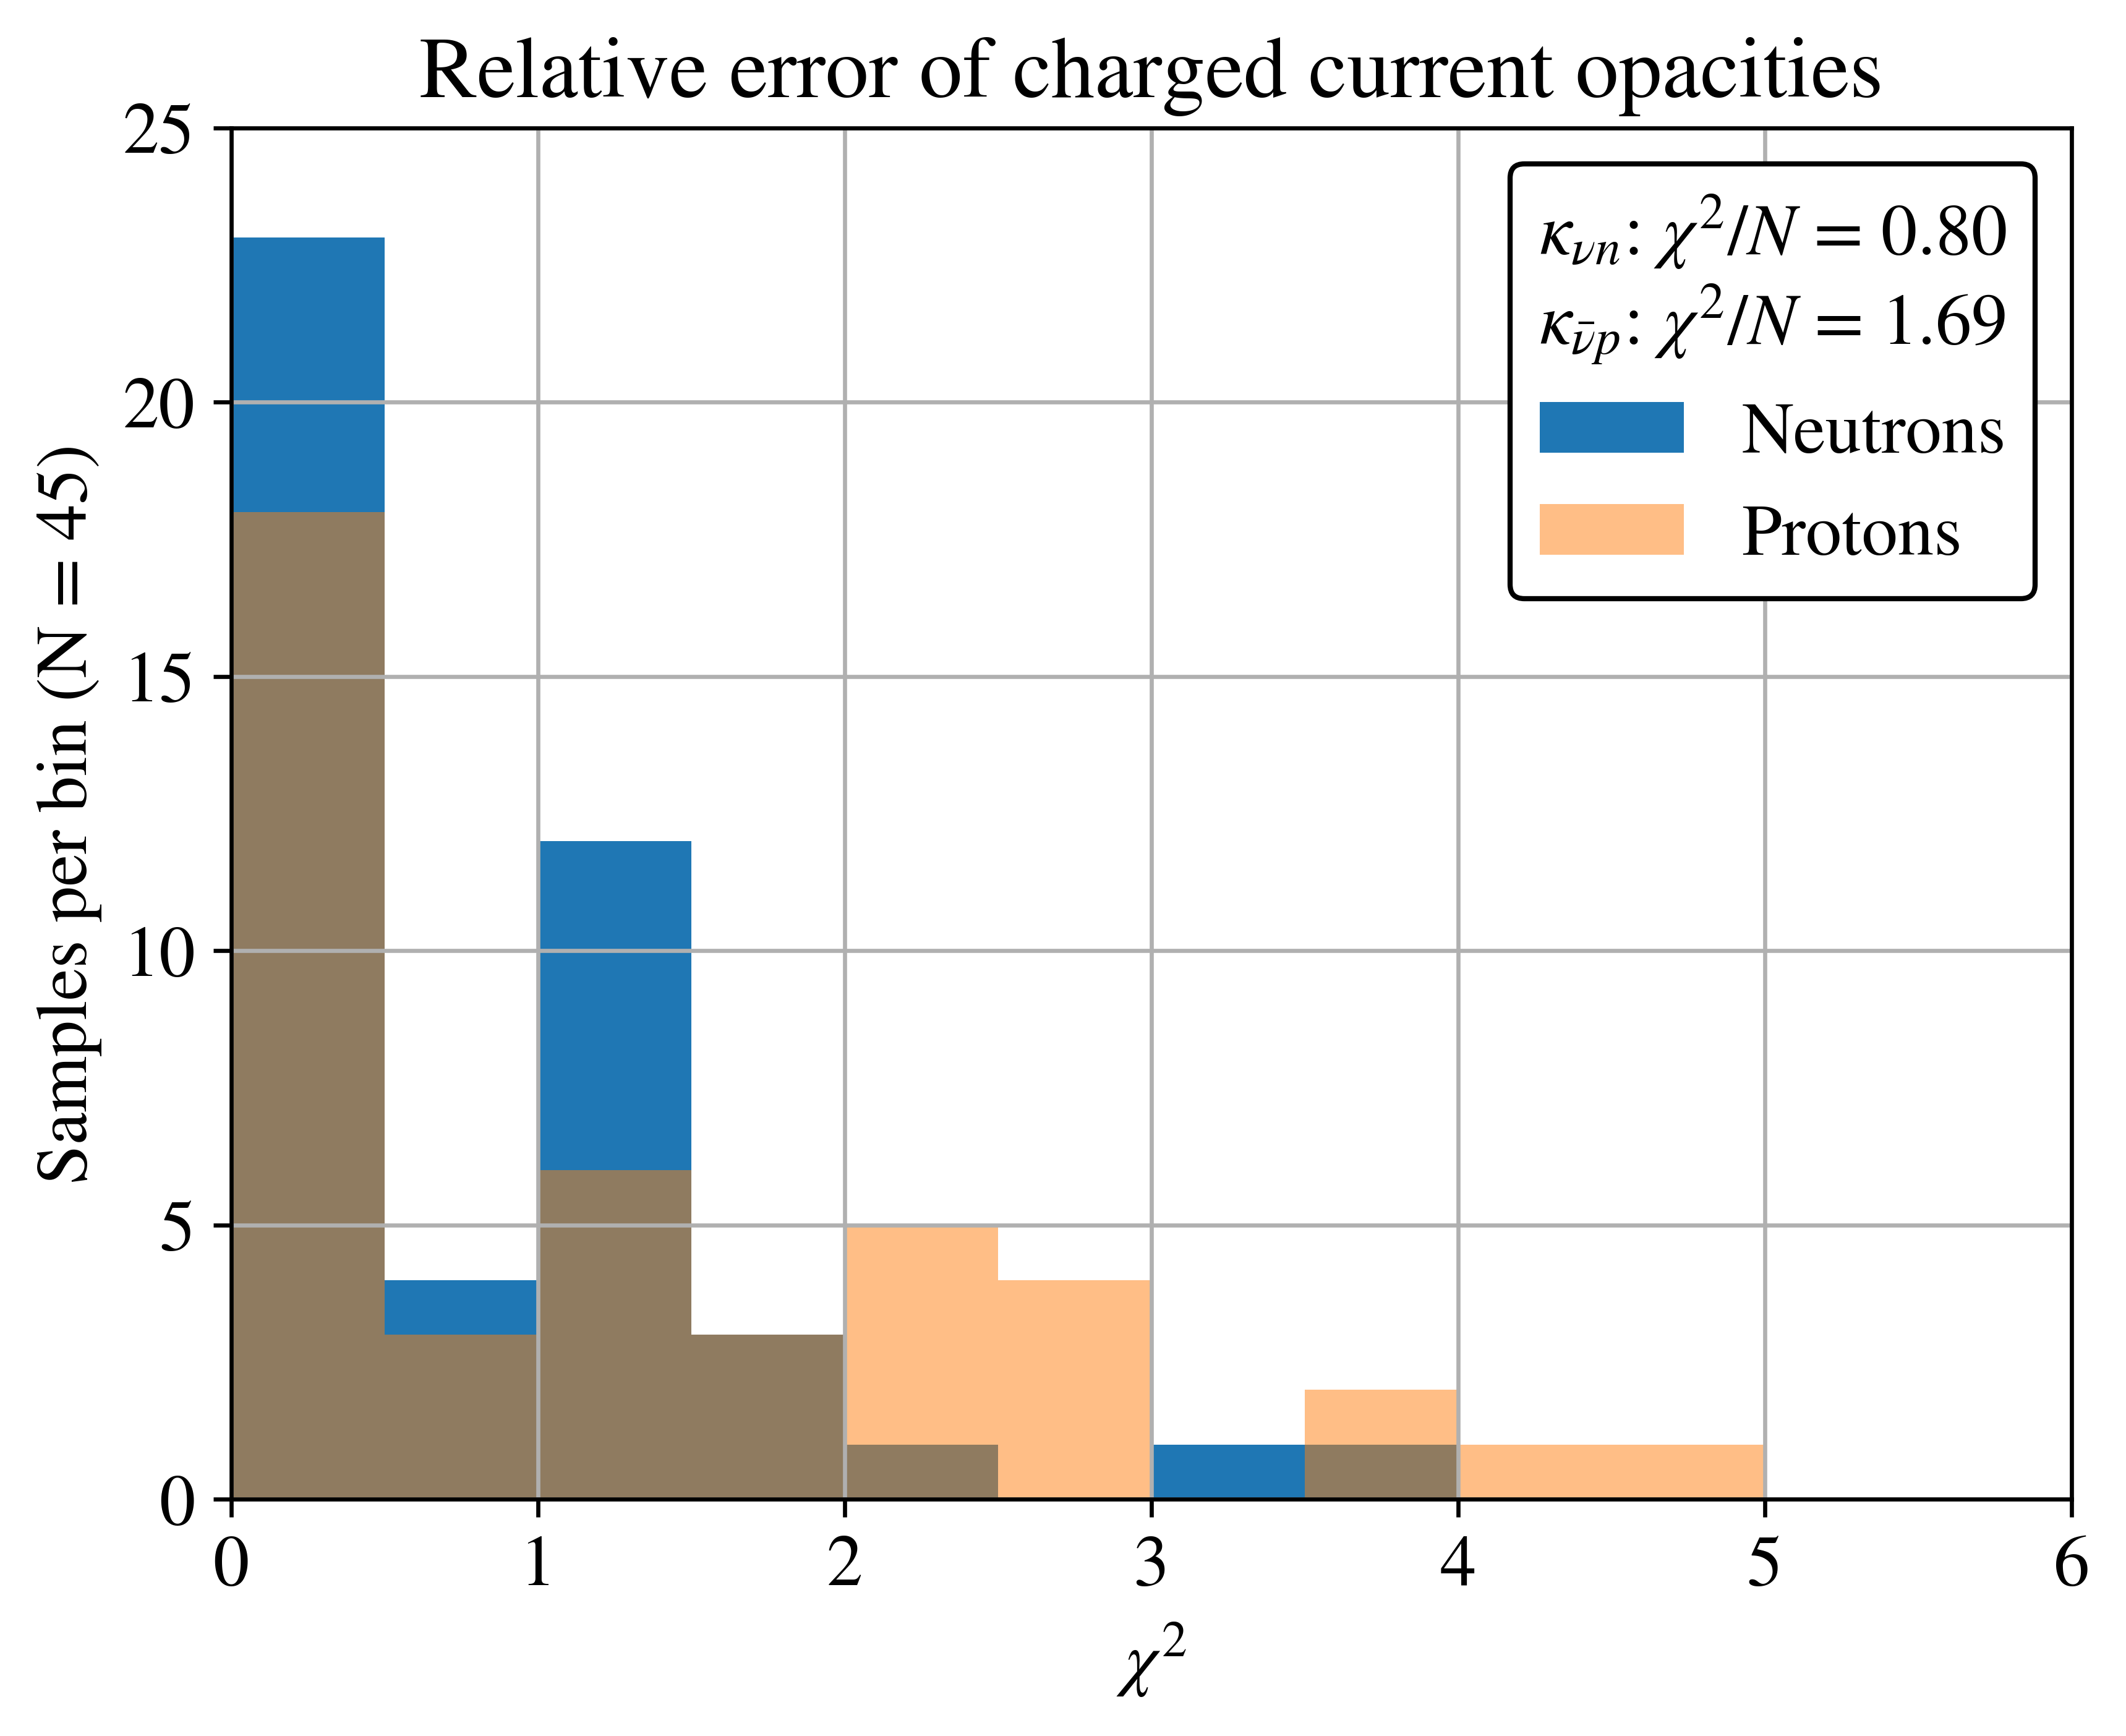

In [99]:
#results csvs have cc of the form
#mean of n, stddev of n, mean of p, stddev of p, n, ndegen, p, pdegen, eB, T, mun, n, yp, knu, cost, ui

cc_filenames = ['./opacity csvs/cc' + elt + '.csv' for elt in ['2', '3', '4', '5', '6']]

data_arr = np.empty((45, 16))
counter = 0
for filename in cc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            data_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

test_ix = 9

sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

chisq_n = (sorted_data[:, 0] - sorted_data[:, 4])**2 / (sorted_data[:, 1]**2 + (sorted_data[:, 13] + sorted_data[:, 9])  / NUCLEON_MASS * sorted_data[:, 4]**2)
chisq_p = (sorted_data[:, 2] - sorted_data[:, 6])**2 / (sorted_data[:, 3]**2 + (sorted_data[:, 13] + sorted_data[:, 9])  / NUCLEON_MASS * sorted_data[:, 6]**2)

nchi = np.sum(chisq_n) / 45
pchi = np.sum(chisq_p) / 45

plt.hist(chisq_n, bins = 40, range = [0, 20])
plt.hist(chisq_p, bins = 40, range = [0, 20], alpha = 0.5)
plt.xlim([0, 6])
plt.ylim([0, 25])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 45)')
plt.title('Relative error of charged current opacities')
plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchi:.2f}')


np.float64(4.7422362810680765)

In [ ]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

nc_filenames = ['./opacity csvs/nc' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]

ncdata_arr = np.empty((54, 27))
counter = 0
for filename in nc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1


ncdata_new = ncdata_arr

pfix_filenames1 = ['./opacity csvs/pfix3' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]
pfix_filenames2 = ['./opacity csvs/pfix4' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]
dpfix_filenames1 = ['./opacity csvs/dpfix3' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]
dpfix_filenames2 = ['./opacity csvs/dpfix4' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]
for f_ix, filename in enumerate(pfix_filenames1):
    print('file')
    mask1 = []
    mean1 = []
    stddev1 = []
    num1 = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 0:
                mask1.append(np.where((np.concatenate((ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -9:-7], ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -5:-3]), axis = 1) == np.array([float(elt) for elt in row[-5:-1]])).all(axis = 1)))
                mean1.append(float(row[0]))
                stddev1.append(float(row[1]))
                num1.append(float(row[-1]))

    mask2 = []
    mean2 = []
    stddev2 = []
    num2 = []
    with open(pfix_filenames2[f_ix], 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 0:
                mask2.append(np.where((np.concatenate((ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -9:-7], ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -5:-3]), axis = 1) == np.array([float(elt) for elt in row[-5:-1]])).all(axis = 1)))
                mean2.append(float(row[0]))
                stddev2.append(float(row[1]))
                num2.append(float(row[-1]))

    for row_ix in range(9):
        found1 = False
        for ix, elt in enumerate(mask1):
            if found1:
                print('duplicate found :(')
            if elt == row_ix:
                found1 = True
                this_row1 = ix
        
        found2 = False
        for ix, elt in enumerate(mask2):
            if found2:
                print('duplicate found :(')
            if elt == row_ix:
                found2 = True
                this_row2 = ix
            
        if found1 and found2:
            new_mean = (100 * ncdata_arr[row_ix, 6] + num1[this_row1] * mean1[this_row1] + num2[this_row2] * mean2[this_row2]) / (100 + num1[this_row1] + num2[this_row2])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 7]**2 + 100 * (ncdata_arr[row_ix, 6] - new_mean)**2 
                + num1[this_row1] * (mean1[this_row1] - new_mean)**2 + (num1[this_row1] - 1) * stddev1[this_row1]**2
                + num2[this_row2] * (mean2[this_row2] - new_mean)**2 + (num2[this_row2] - 1) * stddev2[this_row1]**2)) / (100 + num1[this_row1] + num2[this_row2] - 1)
        elif found1:
            new_mean = (100 * ncdata_arr[row_ix, 6] + num1[this_row1] * mean1[this_row1]) / (100 + num1[this_row1])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 7]**2 + 100 * (ncdata_arr[row_ix, 6] - new_mean)**2 
                + num1[this_row1] * (mean1[this_row1] - new_mean)**2 + (num1[this_row1] - 1) * stddev1[this_row1]**2)) / (100 + num1[this_row1] - 1) 
        elif found2:
            new_mean = (100 * ncdata_arr[row_ix, 6] + num2[this_row2] * mean2[this_row2]) / (100 + num2[this_row2])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 7]**2 + 100 * (ncdata_arr[row_ix, 6] - new_mean)**2 
                + num2[this_row2] * (mean2[this_row2] - new_mean)**2 + (num2[this_row2] - 1) * stddev2[this_row1]**2)) / (100 + num2[this_row2] - 1) 
        else:
            new_mean = ncdata_arr[row_ix, 6]
            new_stddev = sqrt(90 * ncdata_arr[row_ix, 7]**2) / (100 - 1) 

        ncdata_new[row_ix, 6] = new_mean
        ncdata_new[row_ix, 7] = new_stddev

for f_ix, filename in enumerate(dpfix_filenames1):
    print('file')
    mask1 = []
    mean1 = []
    stddev1 = []
    num1 = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 0:
                mask1.append(np.where((np.concatenate((ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -9:-7], ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -5:-3]), axis = 1) == np.array([float(elt) for elt in row[-5:-1]])).all(axis = 1)))
                mean1.append(float(row[0]))
                stddev1.append(float(row[1]))
                num1.append(float(row[-1]))

    mask2 = []
    mean2 = []
    stddev2 = []
    num2 = []
    with open(dpfix_filenames2[f_ix], 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 0:
                mask2.append(np.where((np.concatenate((ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -9:-7], ncdata_arr[f_ix * 9 : (f_ix + 1) * 9, -5:-3]), axis = 1) == np.array([float(elt) for elt in row[-5:-1]])).all(axis = 1)))
                mean2.append(float(row[0]))
                stddev2.append(float(row[1]))
                num2.append(float(row[-1]))

    for row_ix in range(9):
        found1 = False
        for ix, elt in enumerate(mask1):
            if found1:
                print('duplicate found :(')
            if elt == row_ix:
                found1 = True
                this_row1 = ix
        
        found2 = False
        for ix, elt in enumerate(mask2):
            if found2:
                print('duplicate found :(')
            if elt == row_ix:
                found2 = True
                this_row2 = ix
            
        if found1 and found2:
            new_mean = (100 * ncdata_arr[row_ix, 4] + num1[this_row1] * mean1[this_row1] + num2[this_row2] * mean2[this_row2]) / (100 + num1[this_row1] + num2[this_row2])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 5]**2 + 100 * (ncdata_arr[row_ix, 4] - new_mean)**2 
                + num1[this_row1] * (mean1[this_row1] - new_mean)**2 + (num1[this_row1] - 1) * stddev1[this_row1]**2
                + num2[this_row2] * (mean2[this_row2] - new_mean)**2 + (num2[this_row2] - 1) * stddev2[this_row1]**2)) / (100 + num1[this_row1] + num2[this_row2] - 1)
        elif found1:
            new_mean = (100 * ncdata_arr[row_ix, 4] + num1[this_row1] * mean1[this_row1]) / (100 + num1[this_row1])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 5]**2 + 100 * (ncdata_arr[row_ix, 4] - new_mean)**2 
                + num1[this_row1] * (mean1[this_row1] - new_mean)**2 + (num1[this_row1] - 1) * stddev1[this_row1]**2)) / (100 + num1[this_row1] - 1) 
        elif found2:
            new_mean = (100 * ncdata_arr[row_ix, 4] + num2[this_row2] * mean2[this_row2]) / (100 + num2[this_row2])
            new_stddev = sqrt((90 * ncdata_arr[row_ix, 5]**2 + 100 * (ncdata_arr[row_ix, 4] - new_mean)**2 
                + num2[this_row2] * (mean2[this_row2] - new_mean)**2 + (num2[this_row2] - 1) * stddev2[this_row1]**2)) / (100 + num2[this_row2] - 1) 
        else:
            new_mean = ncdata_arr[row_ix, 4]
            new_stddev = sqrt(90 * ncdata_arr[row_ix, 5]**2) / (100 - 1) 

        ncdata_new[row_ix, 4] = new_mean
        ncdata_new[row_ix, 5] = new_stddev



file
file
file
file
file
file
file
file
file
file
file
file


In [32]:
with open('./opacity csvs/newapprox.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        ncdata_new[ix, 14:16] = [float(elt) for elt in row]

<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\k'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_272/1919520821.py:27: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
/tmp/ipykernel_272/1919520821.py:28: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')


(1e-08, 0.0001)

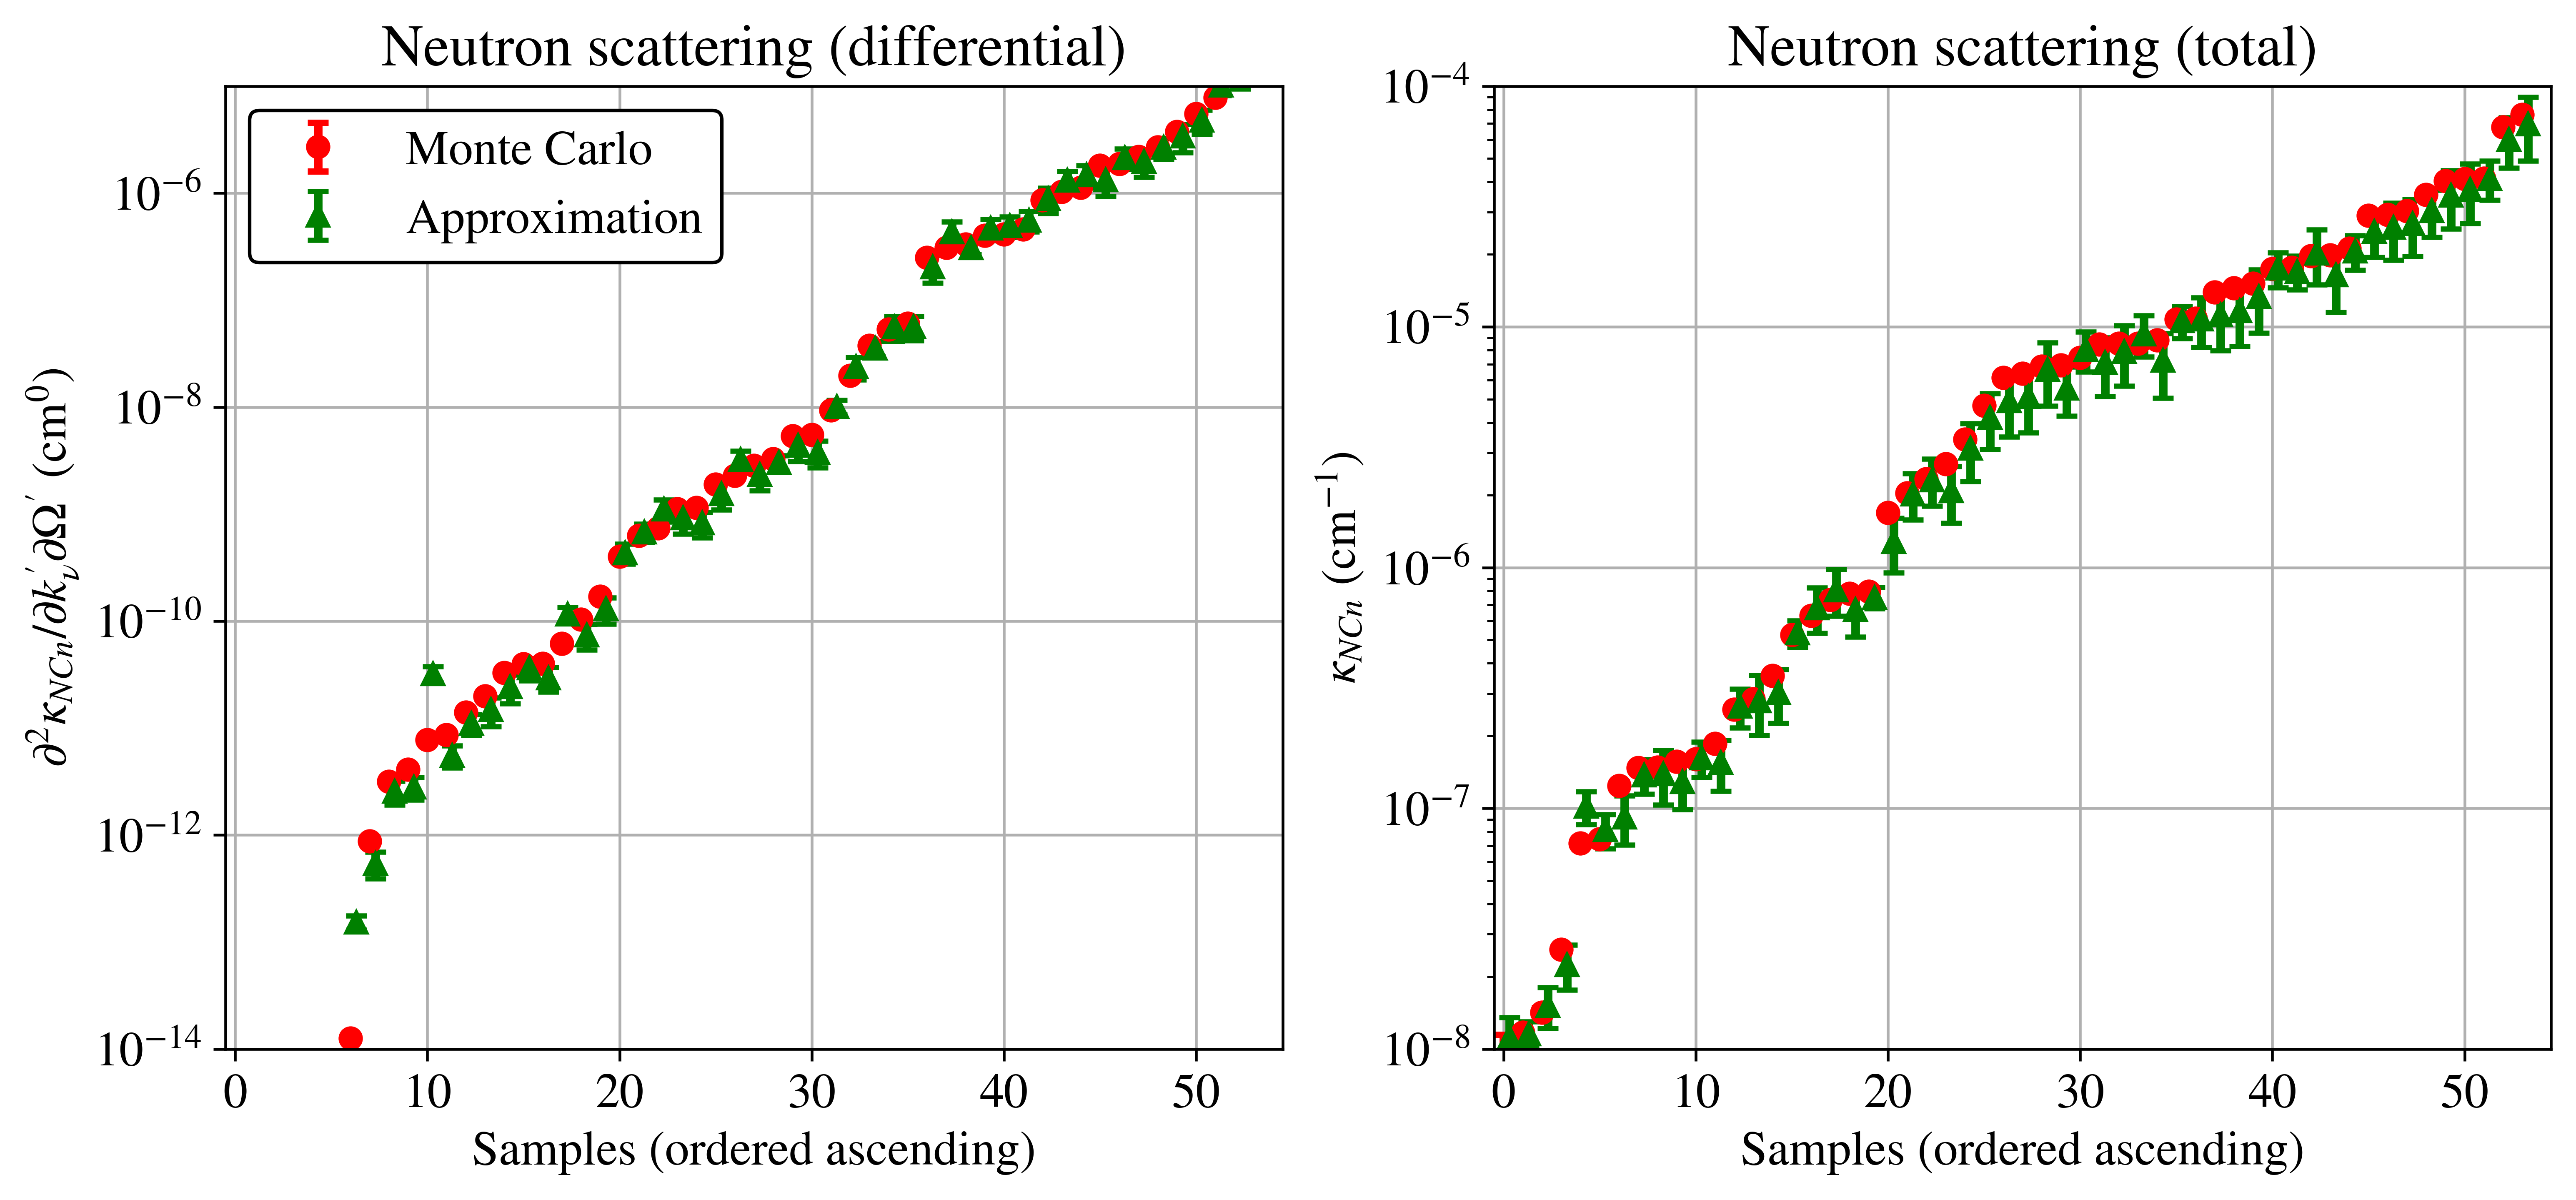

In [ ]:
test_ix = 0
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = axresults csvs have cc of the form
#mean of n, stddev of n, mean of p, stddev of p, n, ndegen, p, pdegen, eB, T, mun, n, yp, knu, cost, ui

cc_filenames = ['./opacity csvs/cc' + elt + '.csv' for elt in ['2', '3', '4', '5', '6']]

data_arr = np.empty((45, 16))
counter = 0
for filename in cc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            data_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

test_ix = 9

sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

chisq_n = (sorted_data[:, 0] - sorted_data[:, 4])**2 / (sorted_data[:, 1]**2 + (sorted_data[:, 13] + sorted_data[:, 9])  / NUCLEON_MASS * sorted_data[:, 4]**2)
chisq_p = (sorted_data[:, 2] - sorted_data[:, 6])**2 / (sorted_data[:, 3]**2 + (sorted_data[:, 13] + sorted_data[:, 9])  / NUCLEON_MASS * sorted_data[:, 6]**2)

xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.8)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 10], np.sqrt((sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS) * sorted_data[:, 10], fmt = 'g^', capsize = 3, capthick = 1.5)

test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 11], np.sqrt((sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS) * sorted_data[:, 11], fmt = 'g^', capsize = 3, capthick = 1.5)


chisq_n = (sorted_data[:, 0] - sorted_data[:, 10])**2 / (sorted_data[:, 1]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 10]**2)


ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax2.set_xlim([-0.6, 3.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutron scattering (differential)')
ax2.set_title('Neutron scattering (total)')
ax1.set_ylim([1e-14, 1e-5])
ax2.set_ylim([1e-8, 1e-4])

In [91]:
chisq_n

array([1.12920226e-01, 4.18844889e+01, 1.30815056e-01, 1.83500323e+00,
       1.93871914e-01, 2.45998688e-01, 2.05890516e+00, 1.73979080e-01,
       8.26827545e-02, 1.74257995e-01, 2.01235569e+01, 4.99093148e-01,
       8.56078145e-01, 2.71054770e+00, 8.61759020e-01, 3.90898184e-01,
       6.67727756e-01, 5.88513626e-01, 3.47201420e-01, 8.73379247e+01,
       1.22493967e+00, 2.86544645e-01, 2.81527764e-03, 2.64031672e-02,
       5.14716138e-03, 1.98975483e+00, 5.78211660e-01, 5.59693649e-01,
       6.06194565e-01, 1.00510011e+00, 1.48047456e+00, 1.32288436e+00,
       1.81100637e-01, 2.02361888e-02, 1.31425766e+00, 3.67193697e+01,
       5.90708480e+00, 6.52667619e-01, 6.32379375e-01, 1.25600905e-01,
       2.32618854e-01, 6.37621261e+01, 3.86480139e-01, 1.44498759e+00,
       8.02770853e+00, 1.59891604e+00, 2.23211220e+00, 2.37989562e+00,
       8.88387324e-01, 8.36665291e-02, 4.91226983e+00, 2.01248845e+02,
       3.90310039e+00, 1.51005551e+00])

<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_272/1080119323.py:34: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_272/1080119323.py:39: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + f'Diff (truncated): $\chi^2 / N$ = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')
/tmp/ipykernel_272/1080119323.py:39: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '

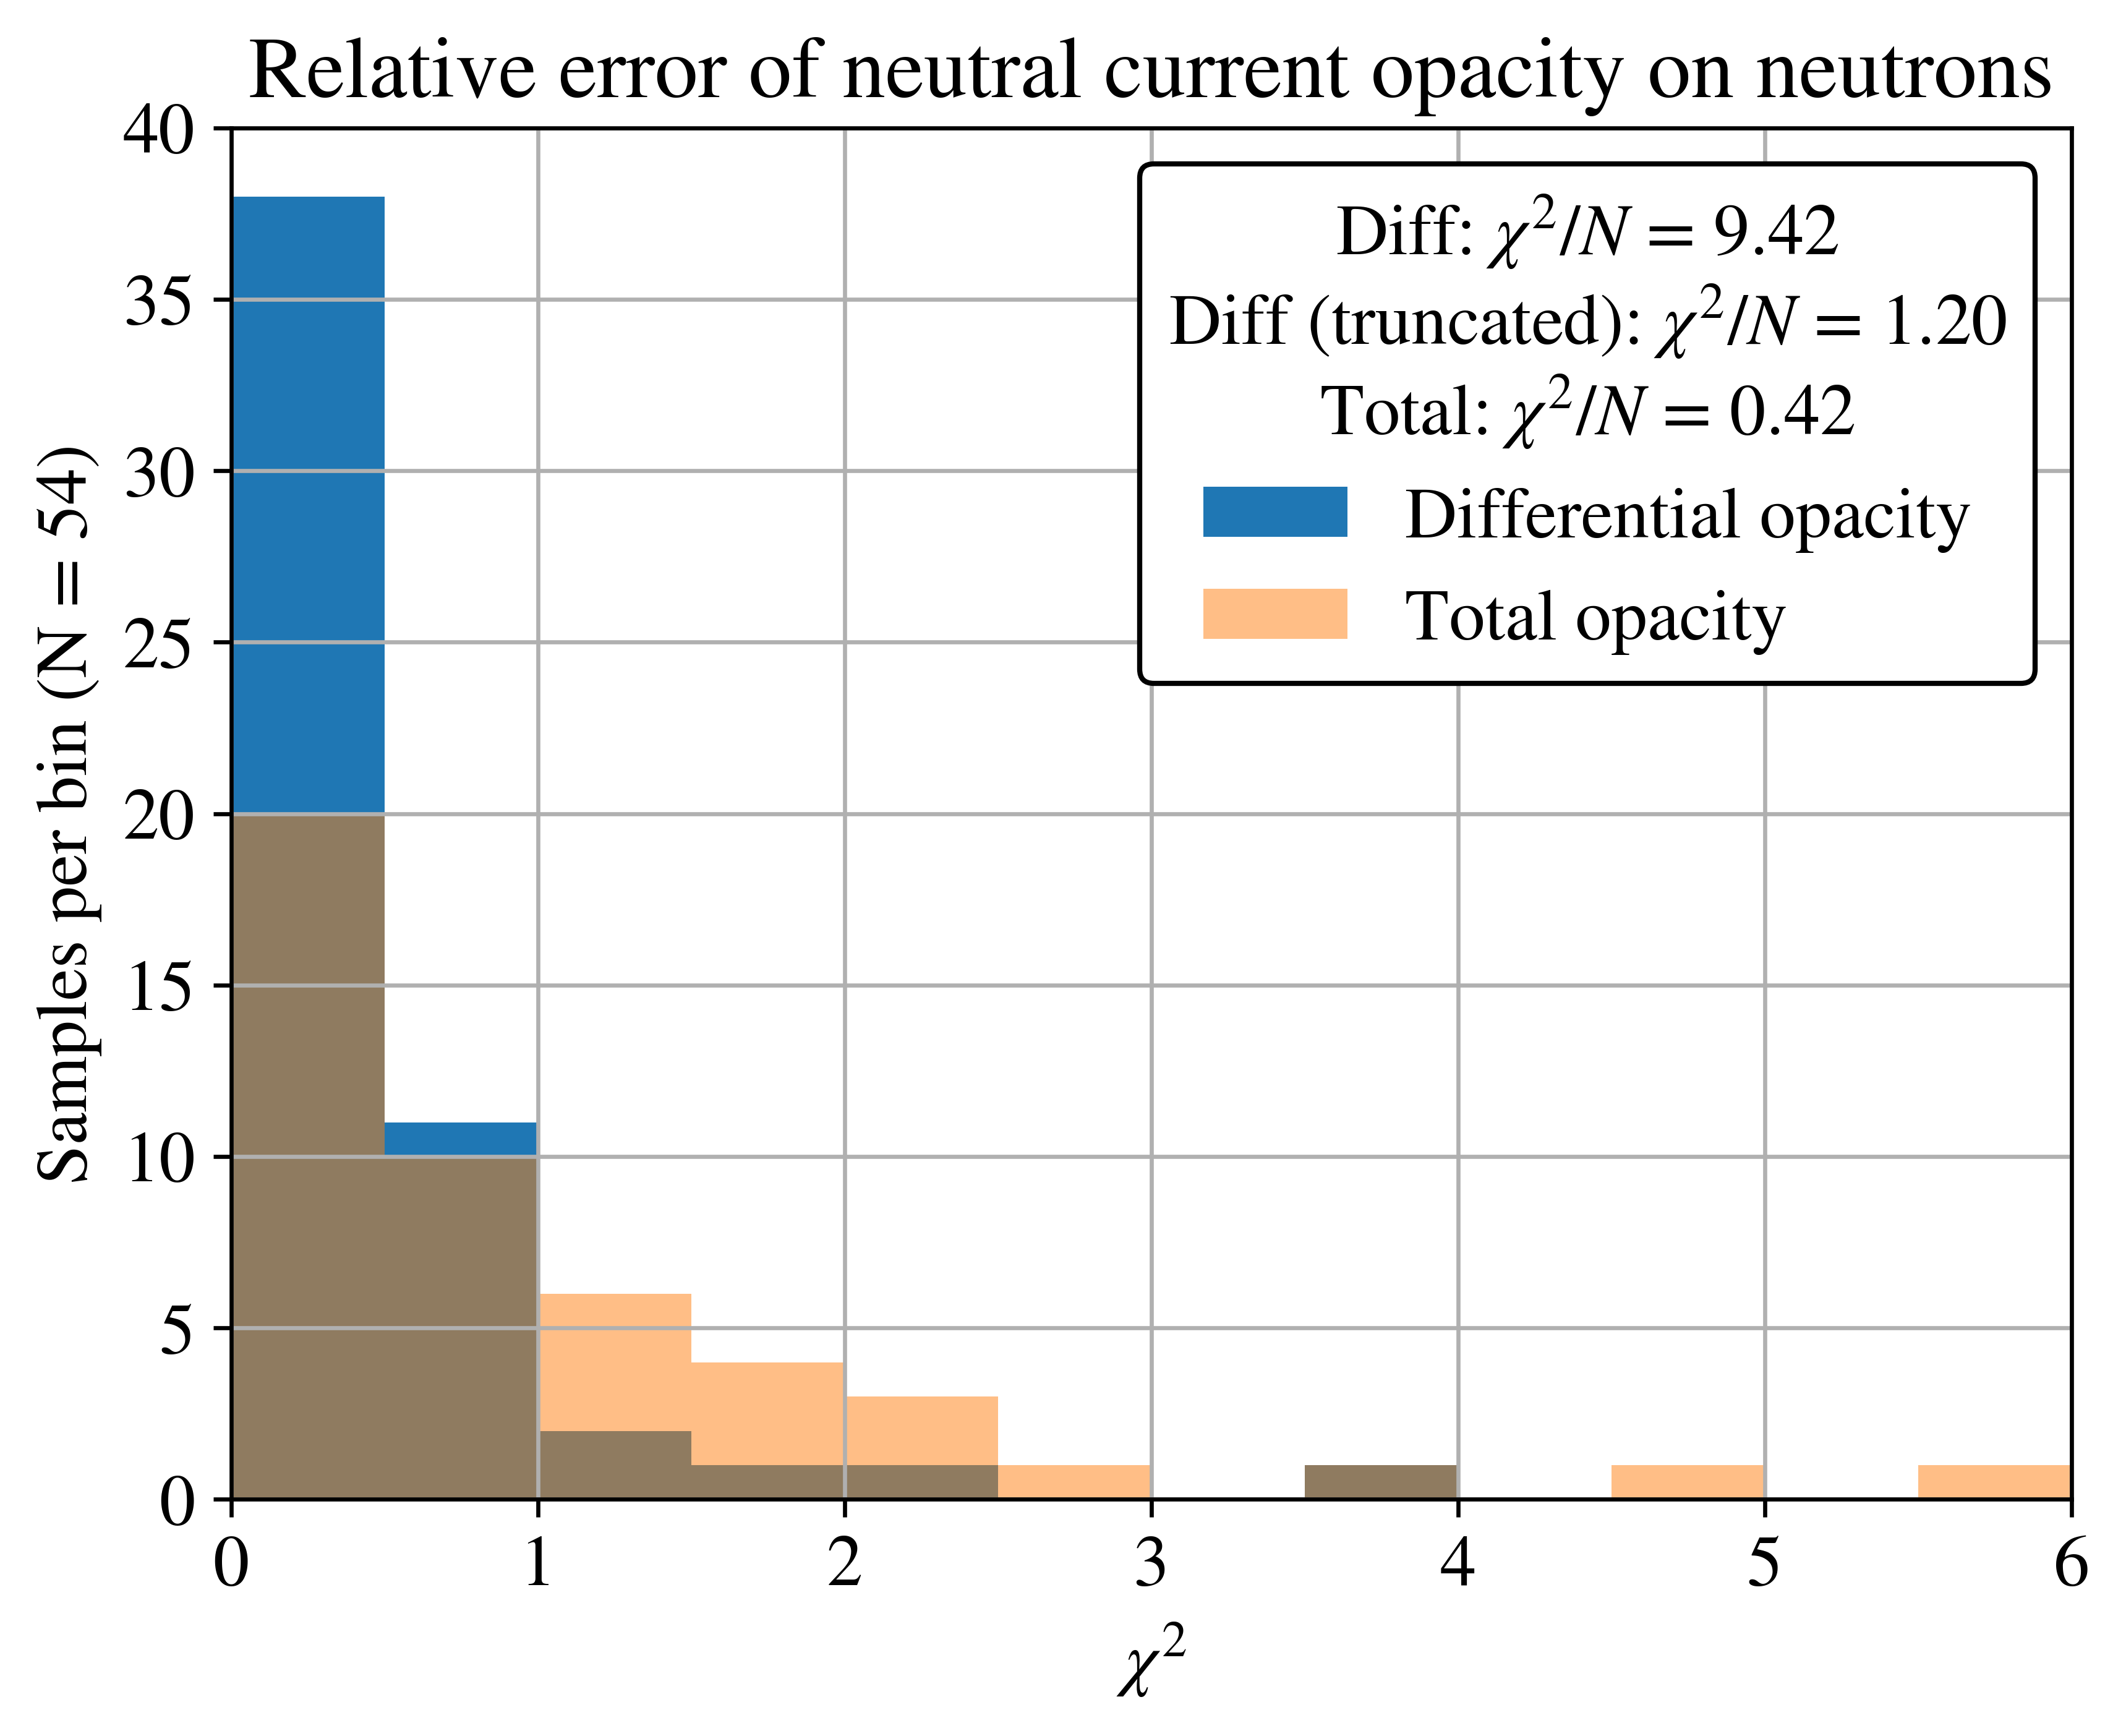

In [111]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

nc_filenames = ['./opacity csvs/nc' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]

ncdata_arr = np.empty((54, 27))
counter = 0
for filename in nc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]

chisq_dn = (sorted_data[:, 0] - sorted_data[:, 10])**2 / (sorted_data[:, 1]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 10]**2)
chisq_n = (sorted_data[:, 2] - sorted_data[:, 11])**2 / (sorted_data[:, 3]**2 + (sorted_data[:, -5] + sorted_data[:, -9])  / NUCLEON_MASS * sorted_data[:, 11]**2)

dnchi_lim = np.average(chisq_dn[chisq_dn < 20]) 
nchi = np.average(chisq_n) 
dnchi = np.average(chisq_dn)

plt.hist(chisq_n, bins = 40, range = [0, 20])
plt.hist(chisq_dn, bins = 40, range = [0, 20], alpha = 0.5)
plt.xlim([0, 6])
plt.ylim([0, 40])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 54)')
#plt.text(11, 40, , fontsize = 20)
#plt.text(11, 34, f'Total: $\chi^2 / N$ = {nchi:.2f}', fontsize = 20)
plt.title('Relative error of neutral current opacity on neutrons')
leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + f'Diff (truncated): $\chi^2 / N$ = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')

leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')


<>:29: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:29: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_268/3712222044.py:29: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3712222044.py:30: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3712222044.py:19: RuntimeWarning: invalid value encountered in subtract
  isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)


(1e-08, 0.0001)

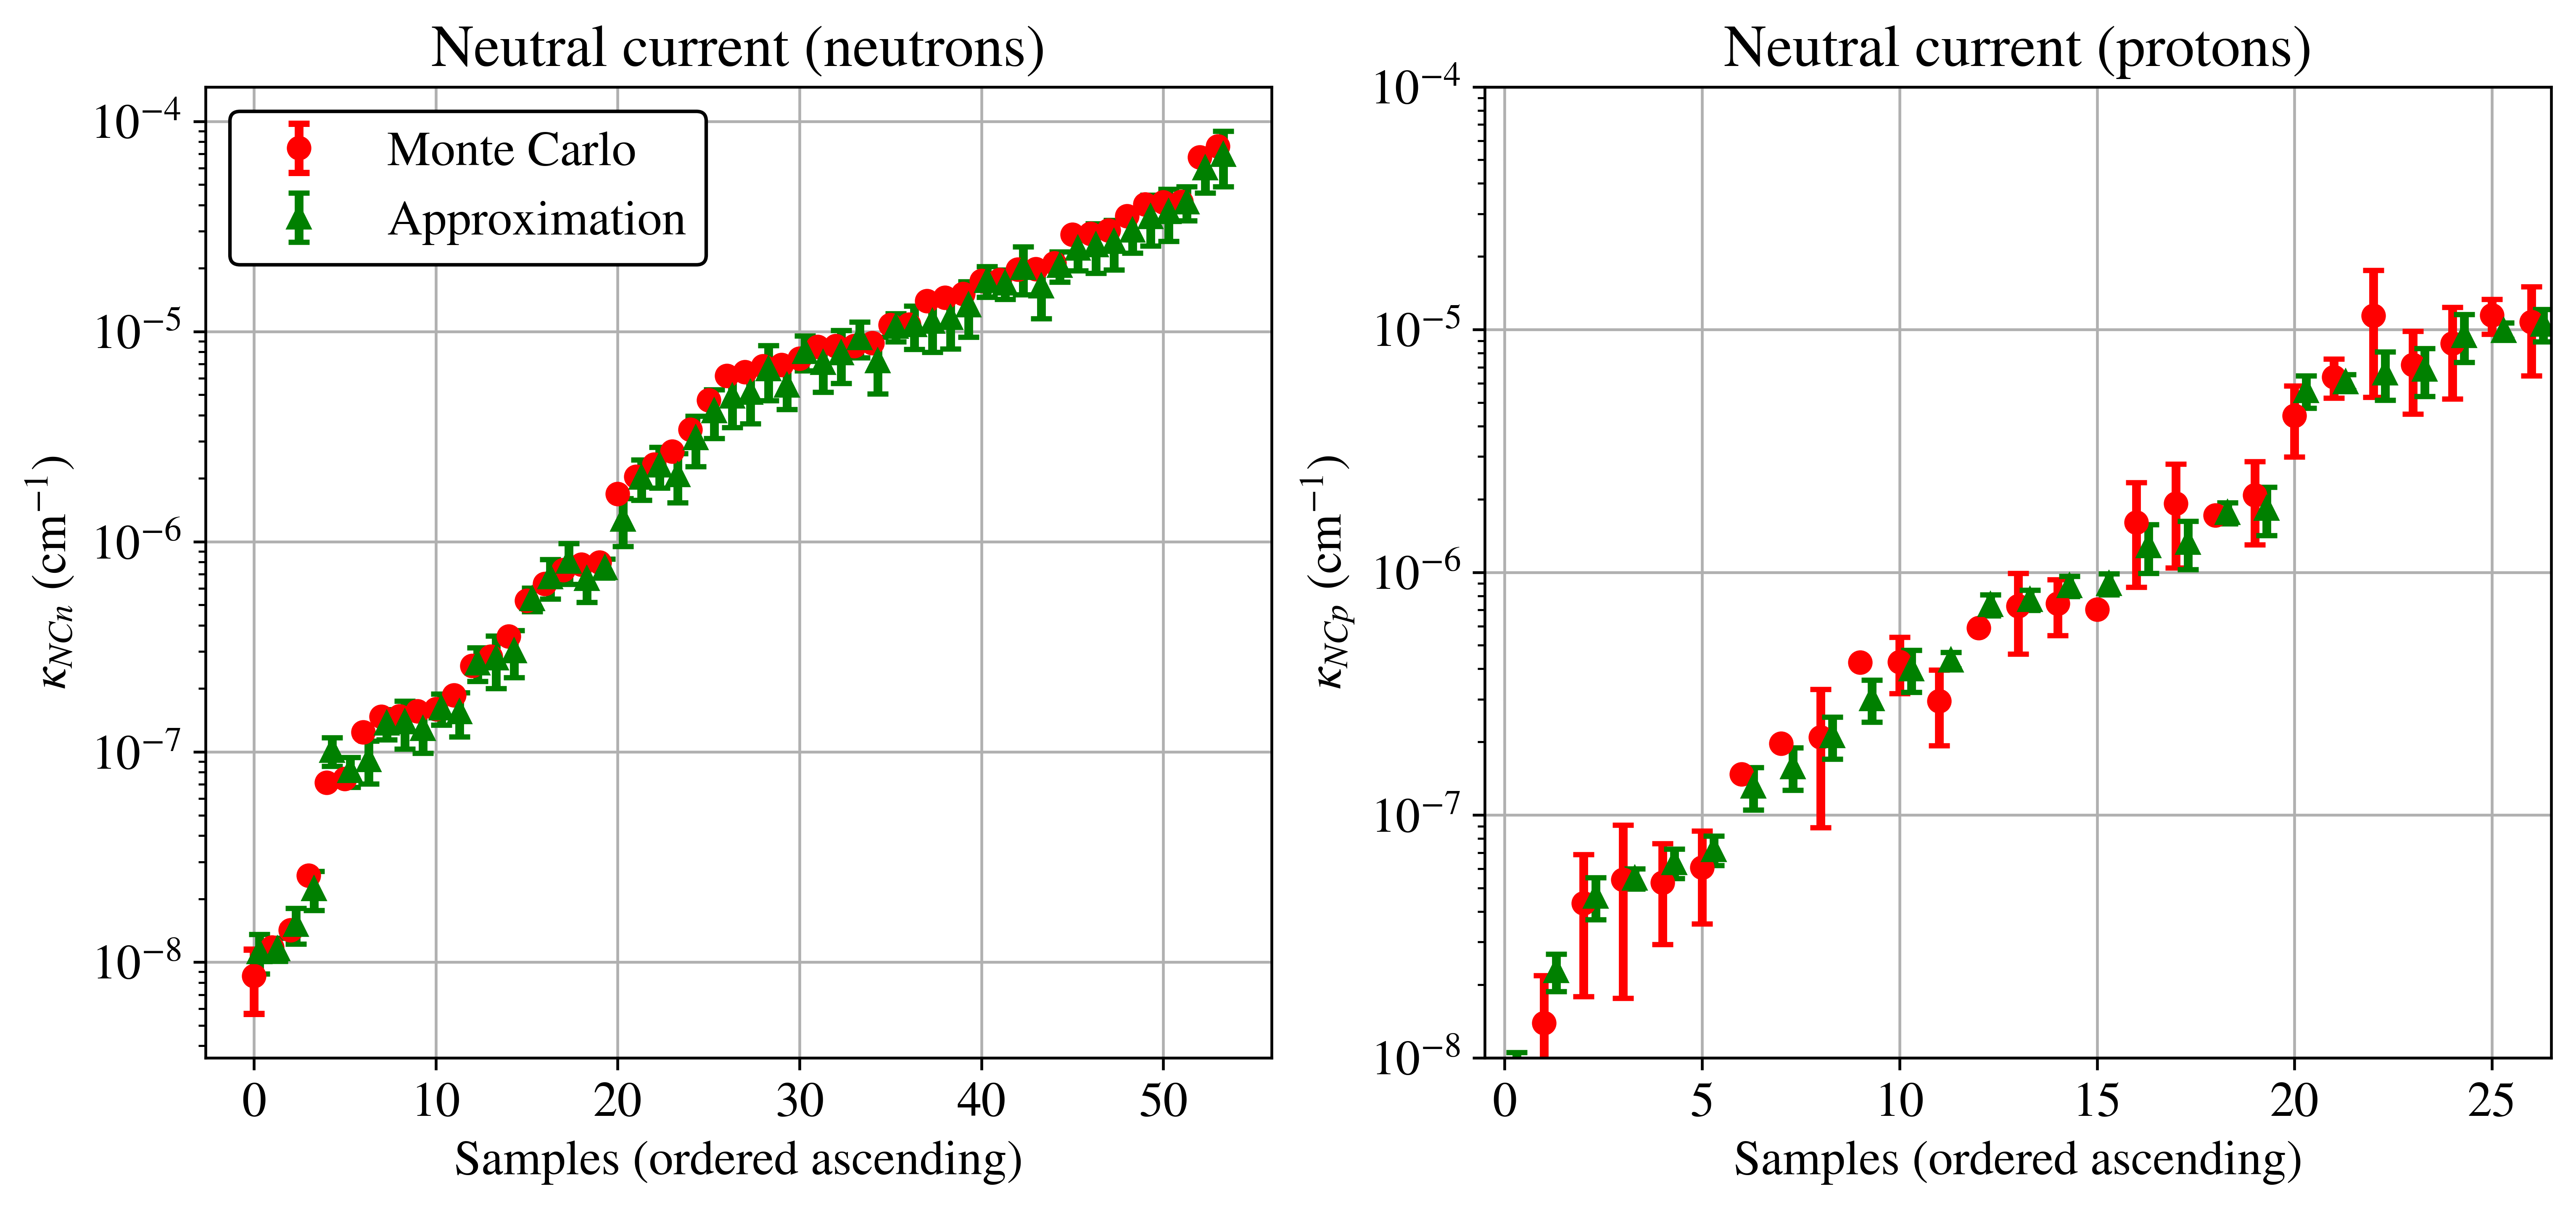

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(54)

test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 11], np.sqrt((sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS) * sorted_data[:, 11], fmt = 'g^', capsize = 3, capthick = 1.5)

chisq_n = (sorted_data[:, 2] - sorted_data[:, 11])**2 / (sorted_data[:, 3]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 11]**2)

test_ix = 15
sorted_both = ncdata_new[np.argsort(ncdata_new[:, test_ix])] #4
isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)
sorted_data = sorted_both[isdegen]

xpts = range(np.sum(isdegen))
ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

chisq_p = (sorted_data[:, 6] - 2 * sorted_data[:, 15])**2 / (sorted_data[:, 7]**2 + (sorted_data[:, -5] + sorted_data[:, -9]) / NUCLEON_MASS * sorted_data[:, 15]**2)

ax1.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.set_xlim([-0.5, np.sum(isdegen) - 0.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)GF**2 * 10**13
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutral current (neutrons)')
ax2.set_title('Neutral current (protons)')
#ax1.set_ylim([1e-15, 1e-5])
ax2.set_ylim([1e-8, 1e-4])

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_268/2598811405.py:9: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_268/2598811405.py:12: SyntaxWarning: invalid escape sequence '\k'
  plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{NC p } $' + f': $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_268/2598811405.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } 

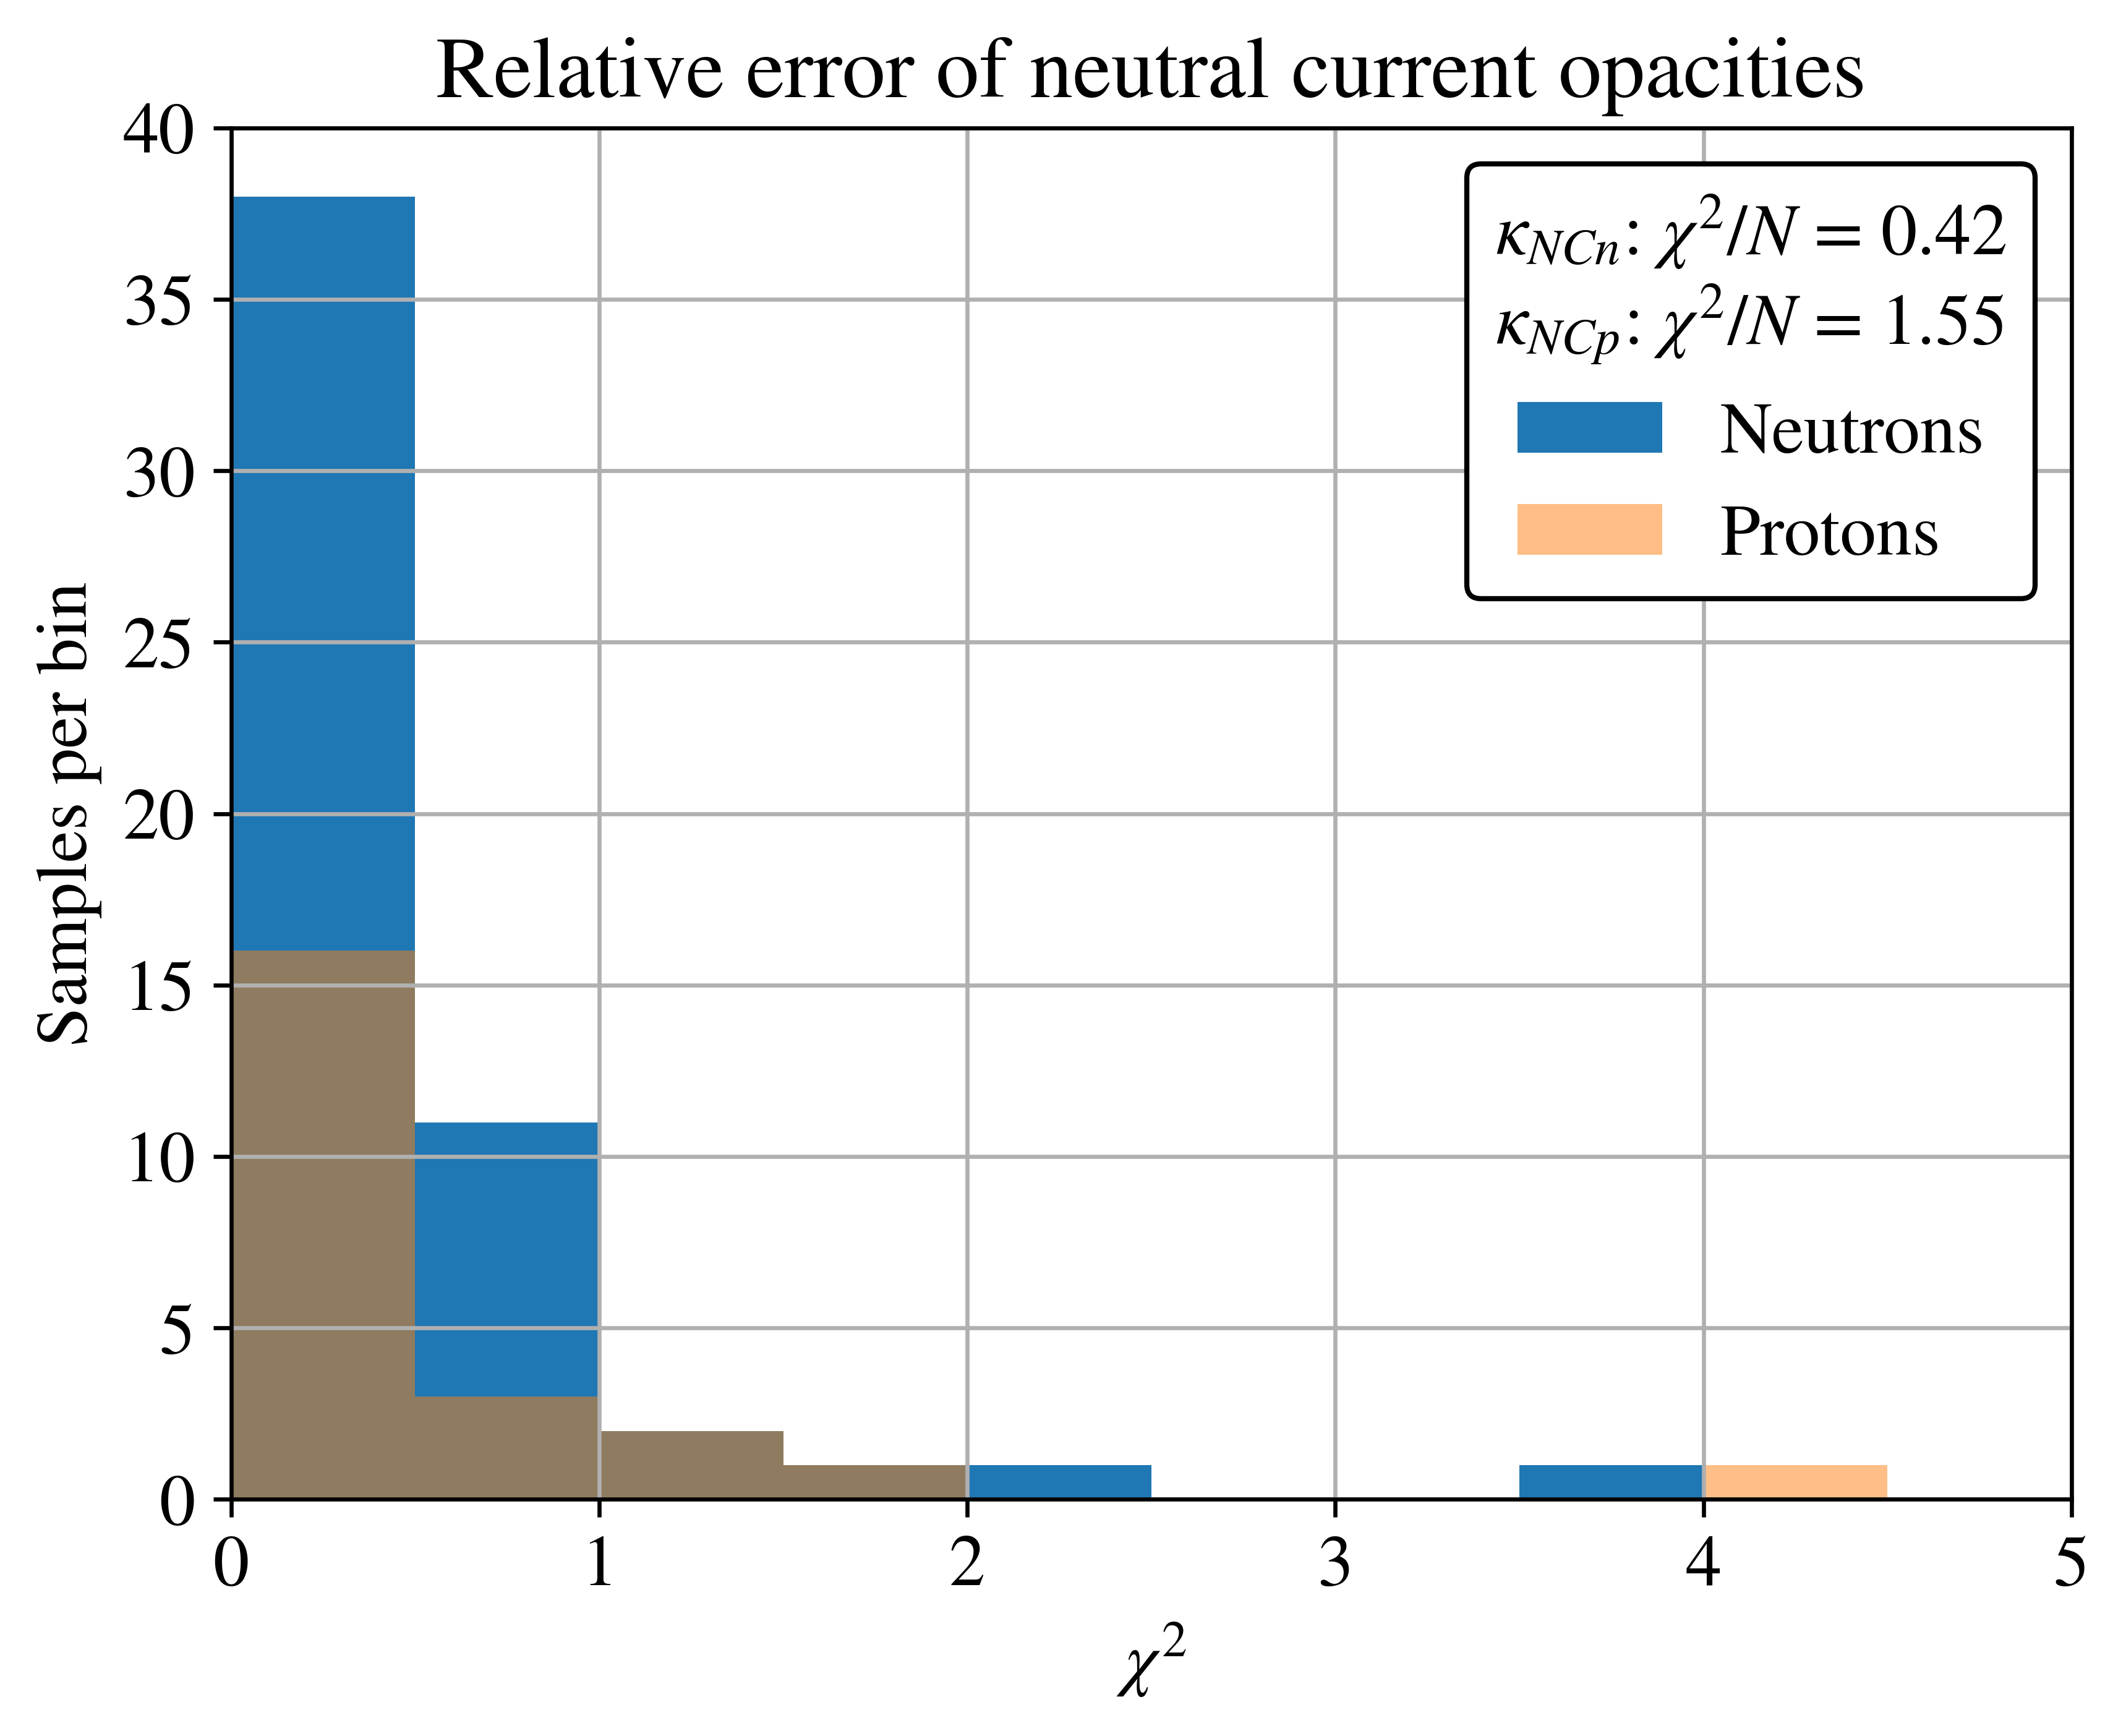

In [65]:
nchi = np.sum(chisq_n) / len(chisq_n)
pchi = np.sum(chisq_p) / len(chisq_p)

plt.hist(chisq_n, bins = 40, range = [0, 20])
plt.hist(chisq_p, bins = 40, range = [0, 20], alpha = 0.5)
plt.xlim([0, 5])
plt.ylim([0, 40])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin')
plt.title('Relative error of neutral current opacities')
plt.legend(['Neutrons', 'Protons'], title = '$\kappa_{NC n } $' + f': $\chi^2 / N$ = {nchi:.2f}' + '\n' + '$\kappa_{NC p } $' + f': $\chi^2 / N$ = {pchi:.2f}')


<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_268/3195869844.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
/tmp/ipykernel_268/3195869844.py:27: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3195869844.py:18: RuntimeWarning: invalid value encountered in subtract
  isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)


(1e-08, 0.0001)

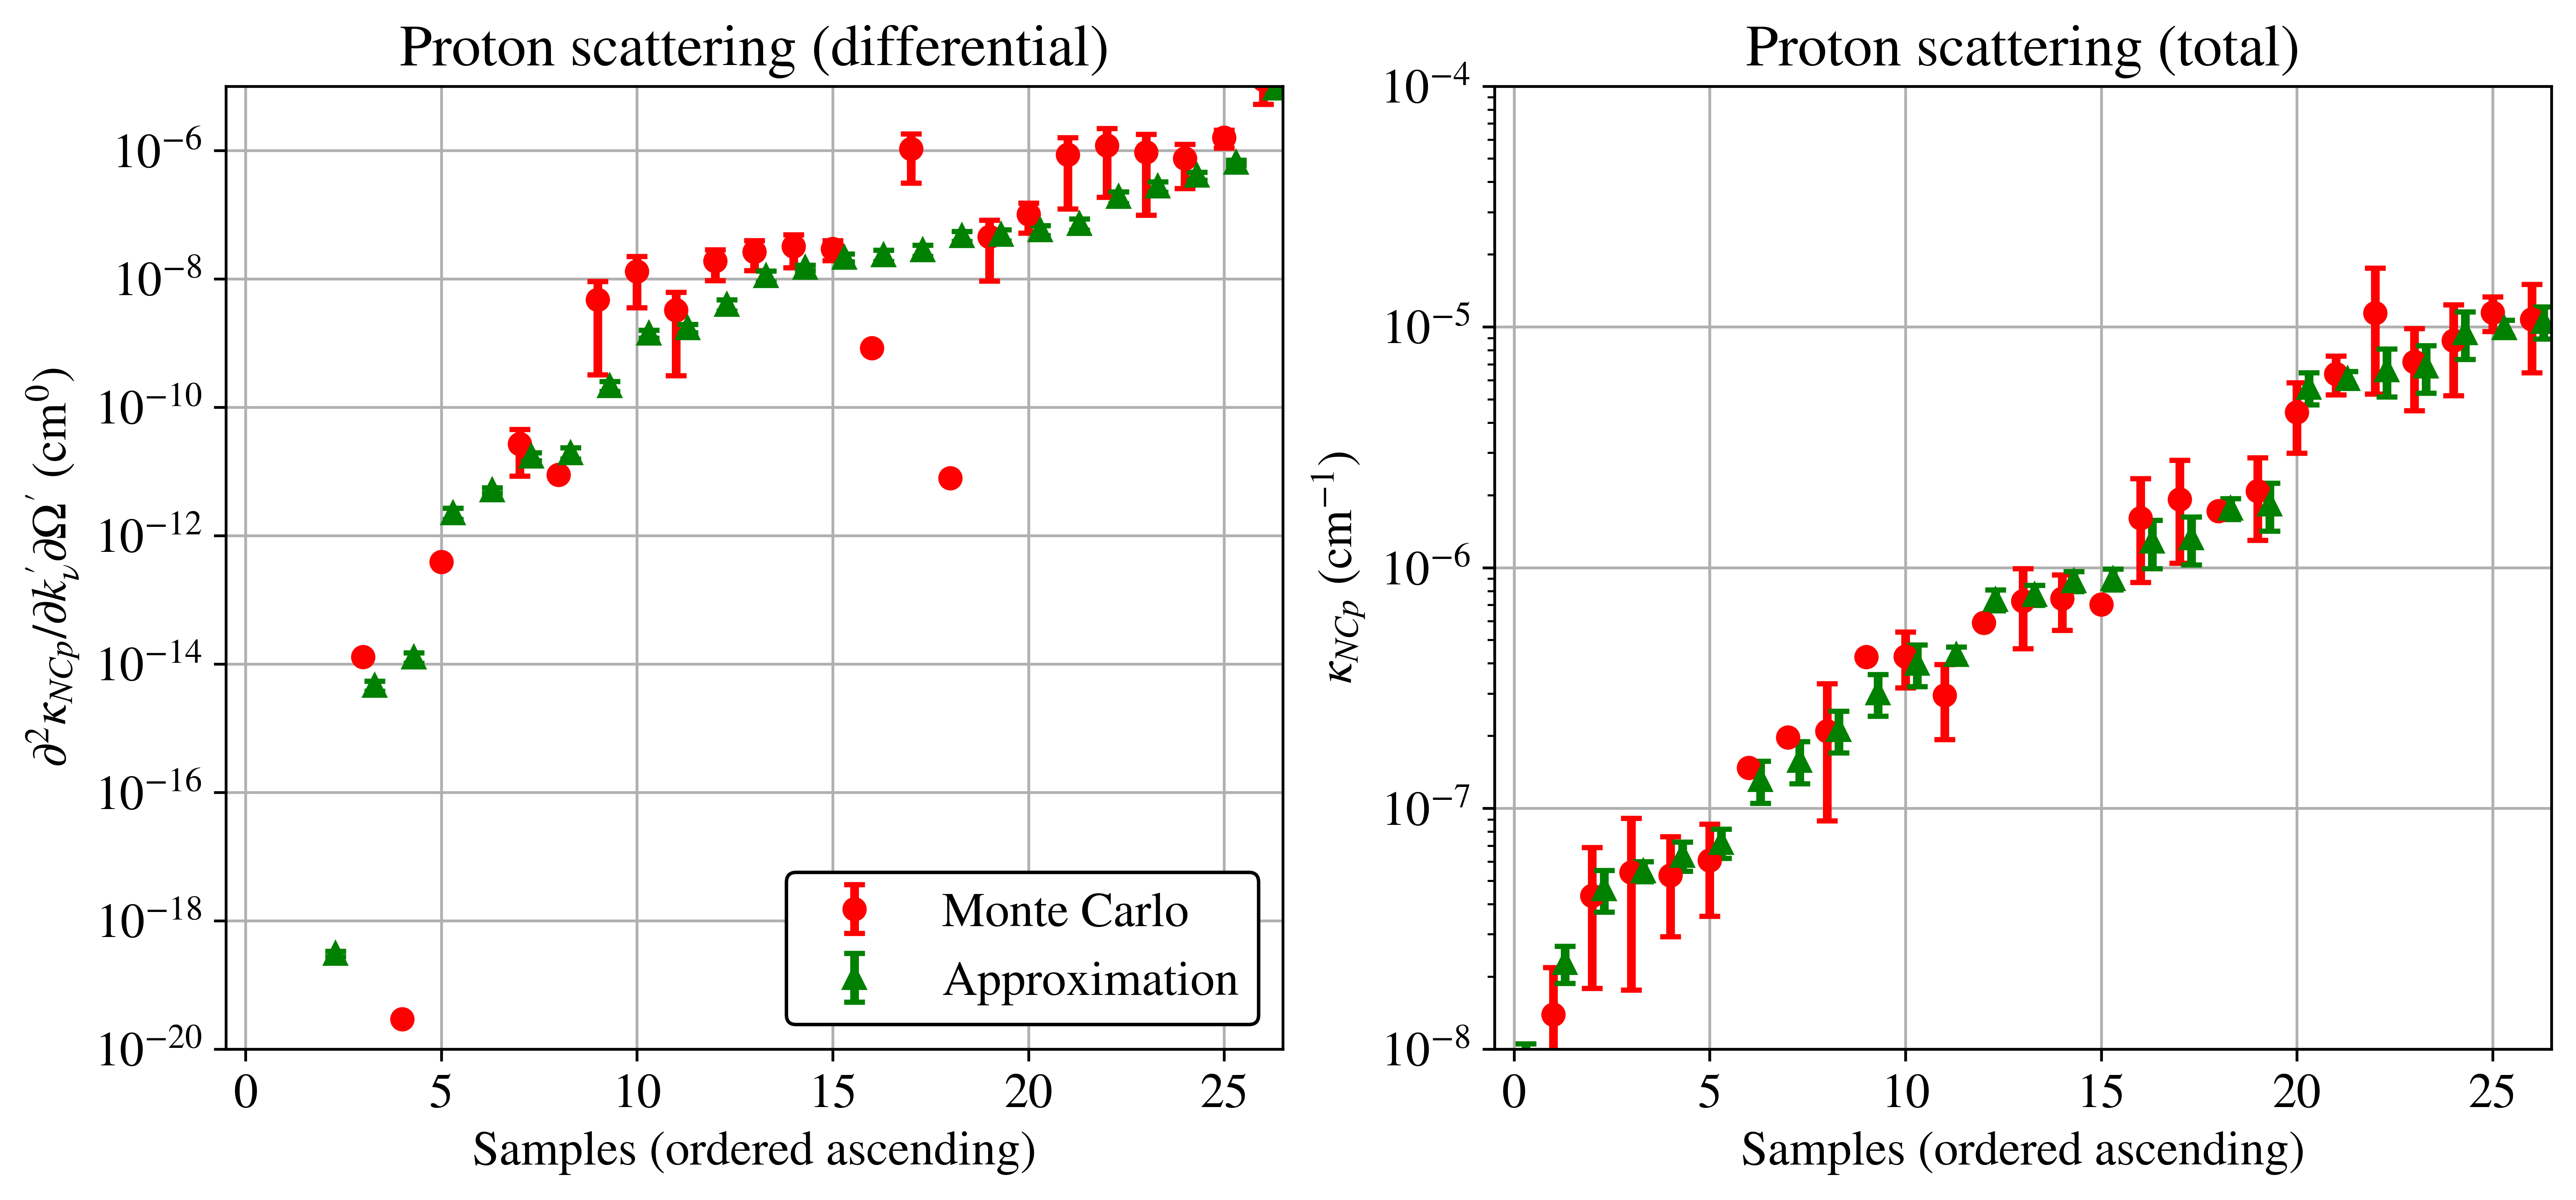

In [35]:
test_ix = 14
sorted_both = ncdata_new[np.argsort(ncdata_new[:, test_ix])] #4
isdegen = sorted_both[:, 4] - sorted_both[:, 5] > 0
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(np.sum(isdegen))#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 4], sorted_data[:, 5], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 14], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 14], fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_xlim([-0.5, np.sum(isdegen) - 0.5])
ax1.set_ylim([1e-20, 1e-5])

test_ix = 15
sorted_both = ncdata_new[np.argsort(ncdata_new[:, test_ix])] #4
isdegen = np.logical_and(sorted_both[:, 6] - sorted_both[:, 7] > 0, sorted_both[:, 6] < 10**10)
sorted_data = sorted_both[isdegen]

xpts = range(np.sum(isdegen))
ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.set_xlim([-0.5, np.sum(isdegen) - 0.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Proton scattering (differential)')
ax2.set_title('Proton scattering (total)')
#ax1.set_ylim([1e-15, 1e-5])
ax2.set_ylim([1e-8, 1e-4])

<>:51: SyntaxWarning: invalid escape sequence '\k'
<>:52: SyntaxWarning: invalid escape sequence '\k'
<>:51: SyntaxWarning: invalid escape sequence '\k'
<>:52: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/4172705539.py:51: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
/tmp/ipykernel_428/4172705539.py:52: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')


(1e-10, 1e-06)

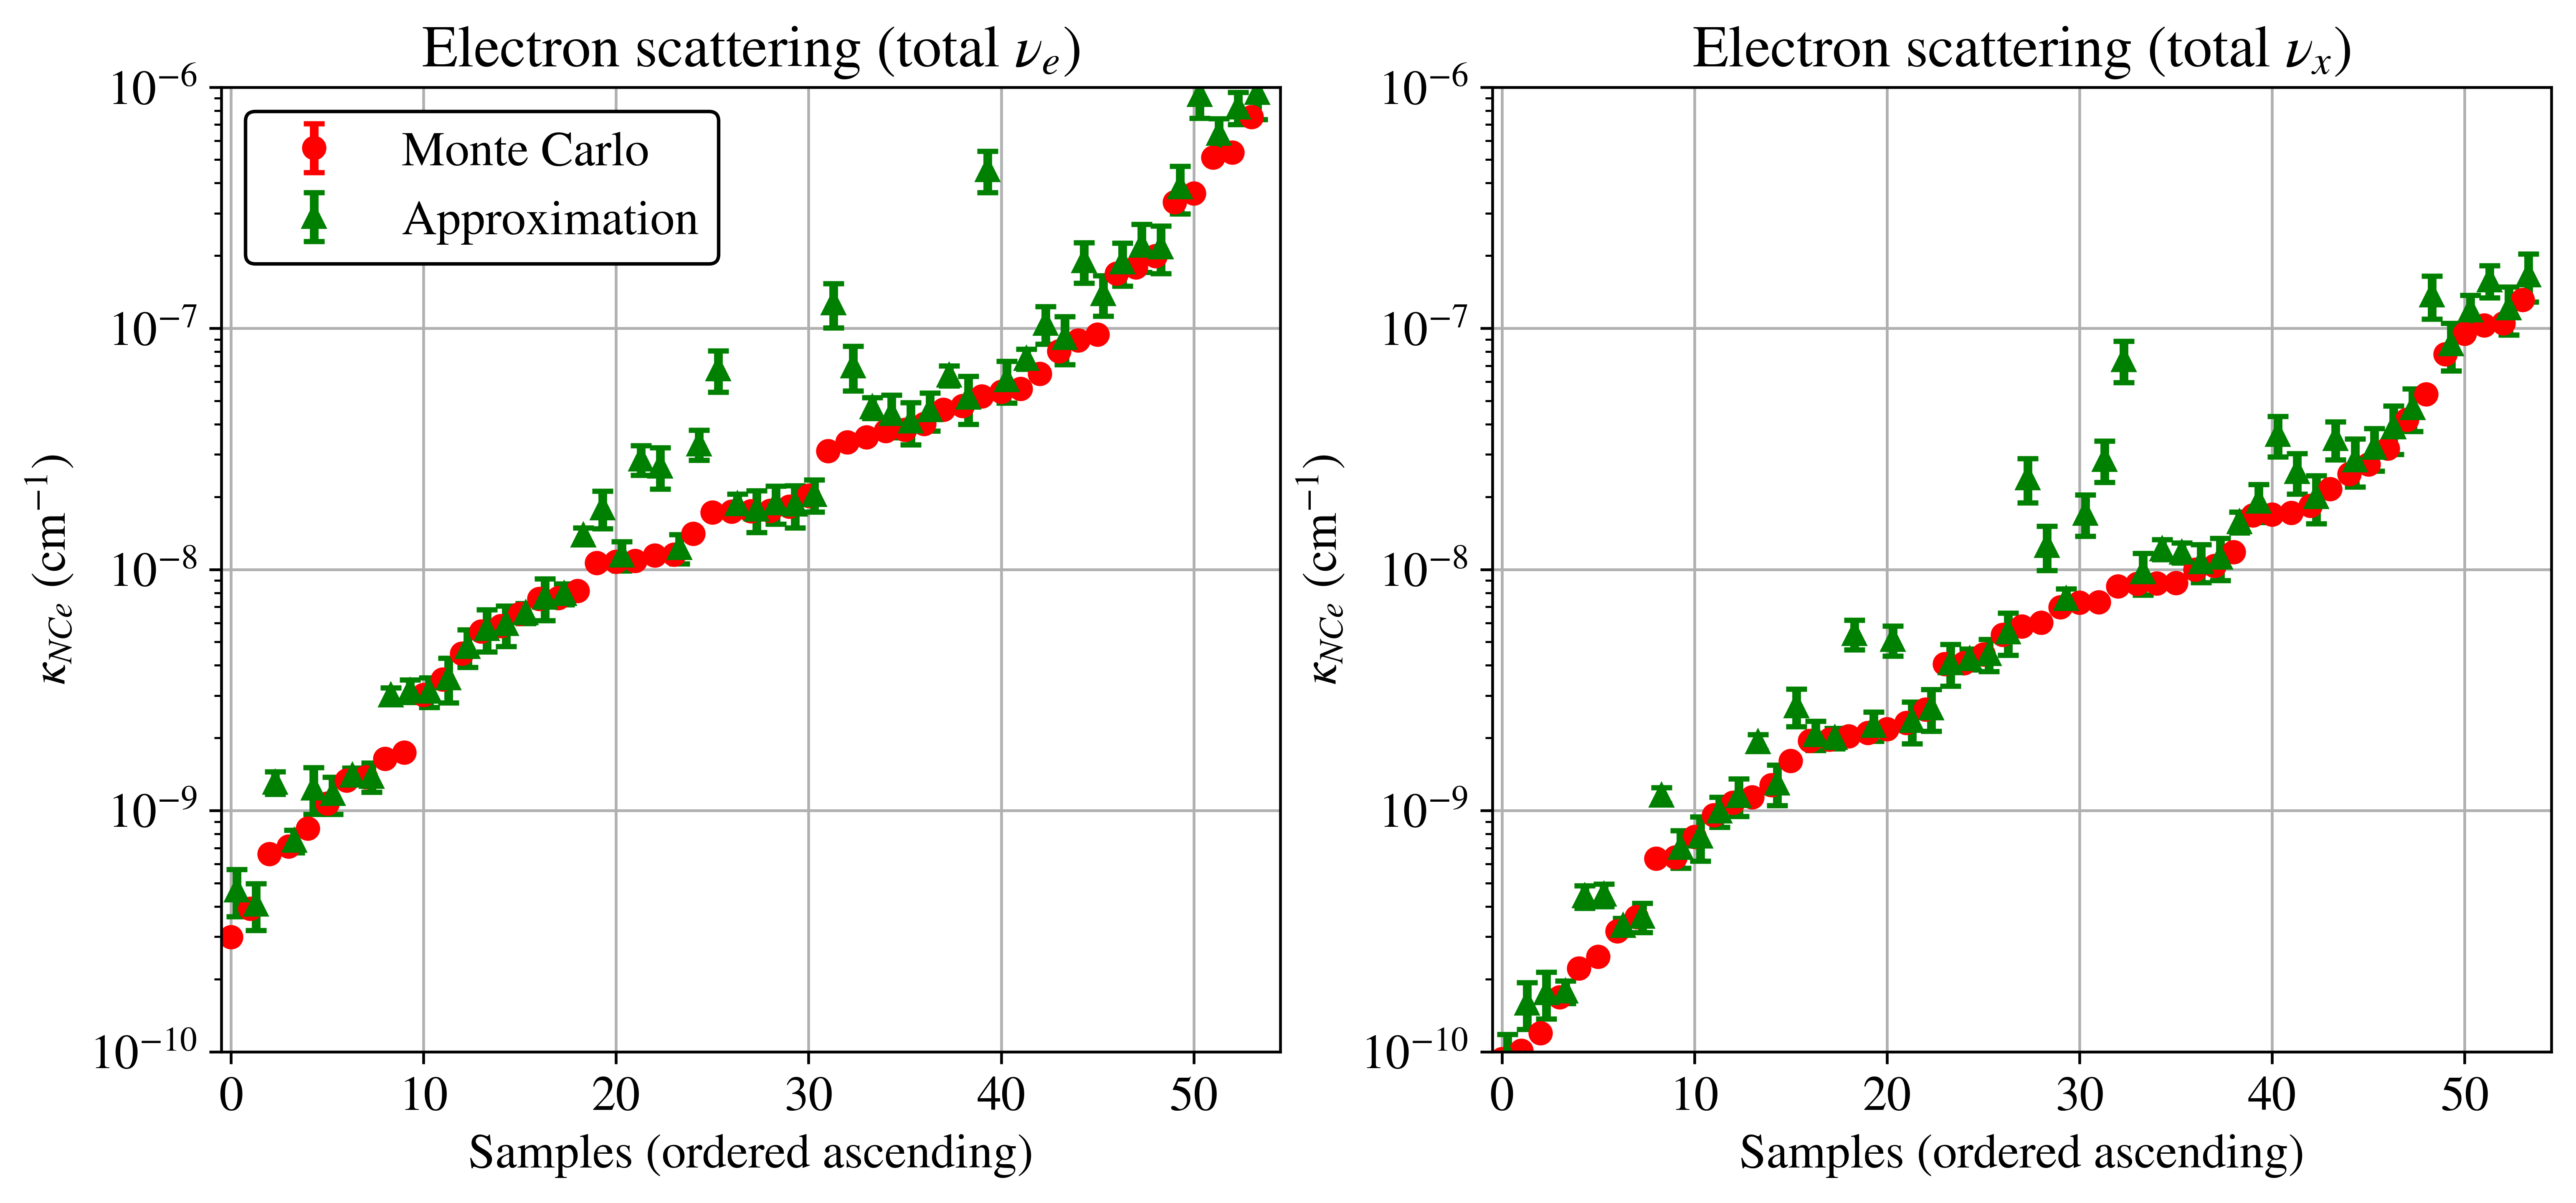

In [ ]:
ncdata_arr = np.empty((54, 8))
counter = 0
with open("./opacity csvs/nce.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for ix, elt in enumerate(row):
            if elt == '-Times-': 
                row[ix] = 0
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

test_ix = 0
sorted_data = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 2], np.sqrt(sorted_data[:, 4] / NUCLEON_MASS) * sorted_data[:, 2], fmt = 'g^', capsize = 3, capthick = 1.5)

ncdata_arr = np.empty((54, 8))
counter = 0
with open("./opacity csvs/ncx.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for ix, elt in enumerate(row):
            if elt == '-Times-': 
                row[ix] = 0
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

test_ix = 0
sorted_data = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])]

xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 2], np.sqrt(sorted_data[:, 4] / NUCLEON_MASS) * sorted_data[:, 2], fmt = 'g^', capsize = 3, capthick = 1.5)

#test_ix = 6
#sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
#isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
#sorted_data = sorted_both[isdegen]
#xpts = range(54) #sorted_data[:, test_ix] * HBARC
#ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
#ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Electron scattering (total $\\nu_e$)')
ax2.set_title('Electron scattering (total $\\nu_x$)')
ax1.set_ylim([1e-10, 1e-6])
ax2.set_ylim([1e-10, 1e-6])

In [4]:
nc_filenames = ['./opacity csvs/nc' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]

ncdata_arr = np.empty((54, 27))
counter = 0
for filename in nc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_268/3524140048.py:30: SyntaxWarning: invalid escape sequence '\k'
  ax[0].set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_268/3524140048.py:32: SyntaxWarning: invalid escape sequence '\k'
  ax[1].set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-07, 3e-05)

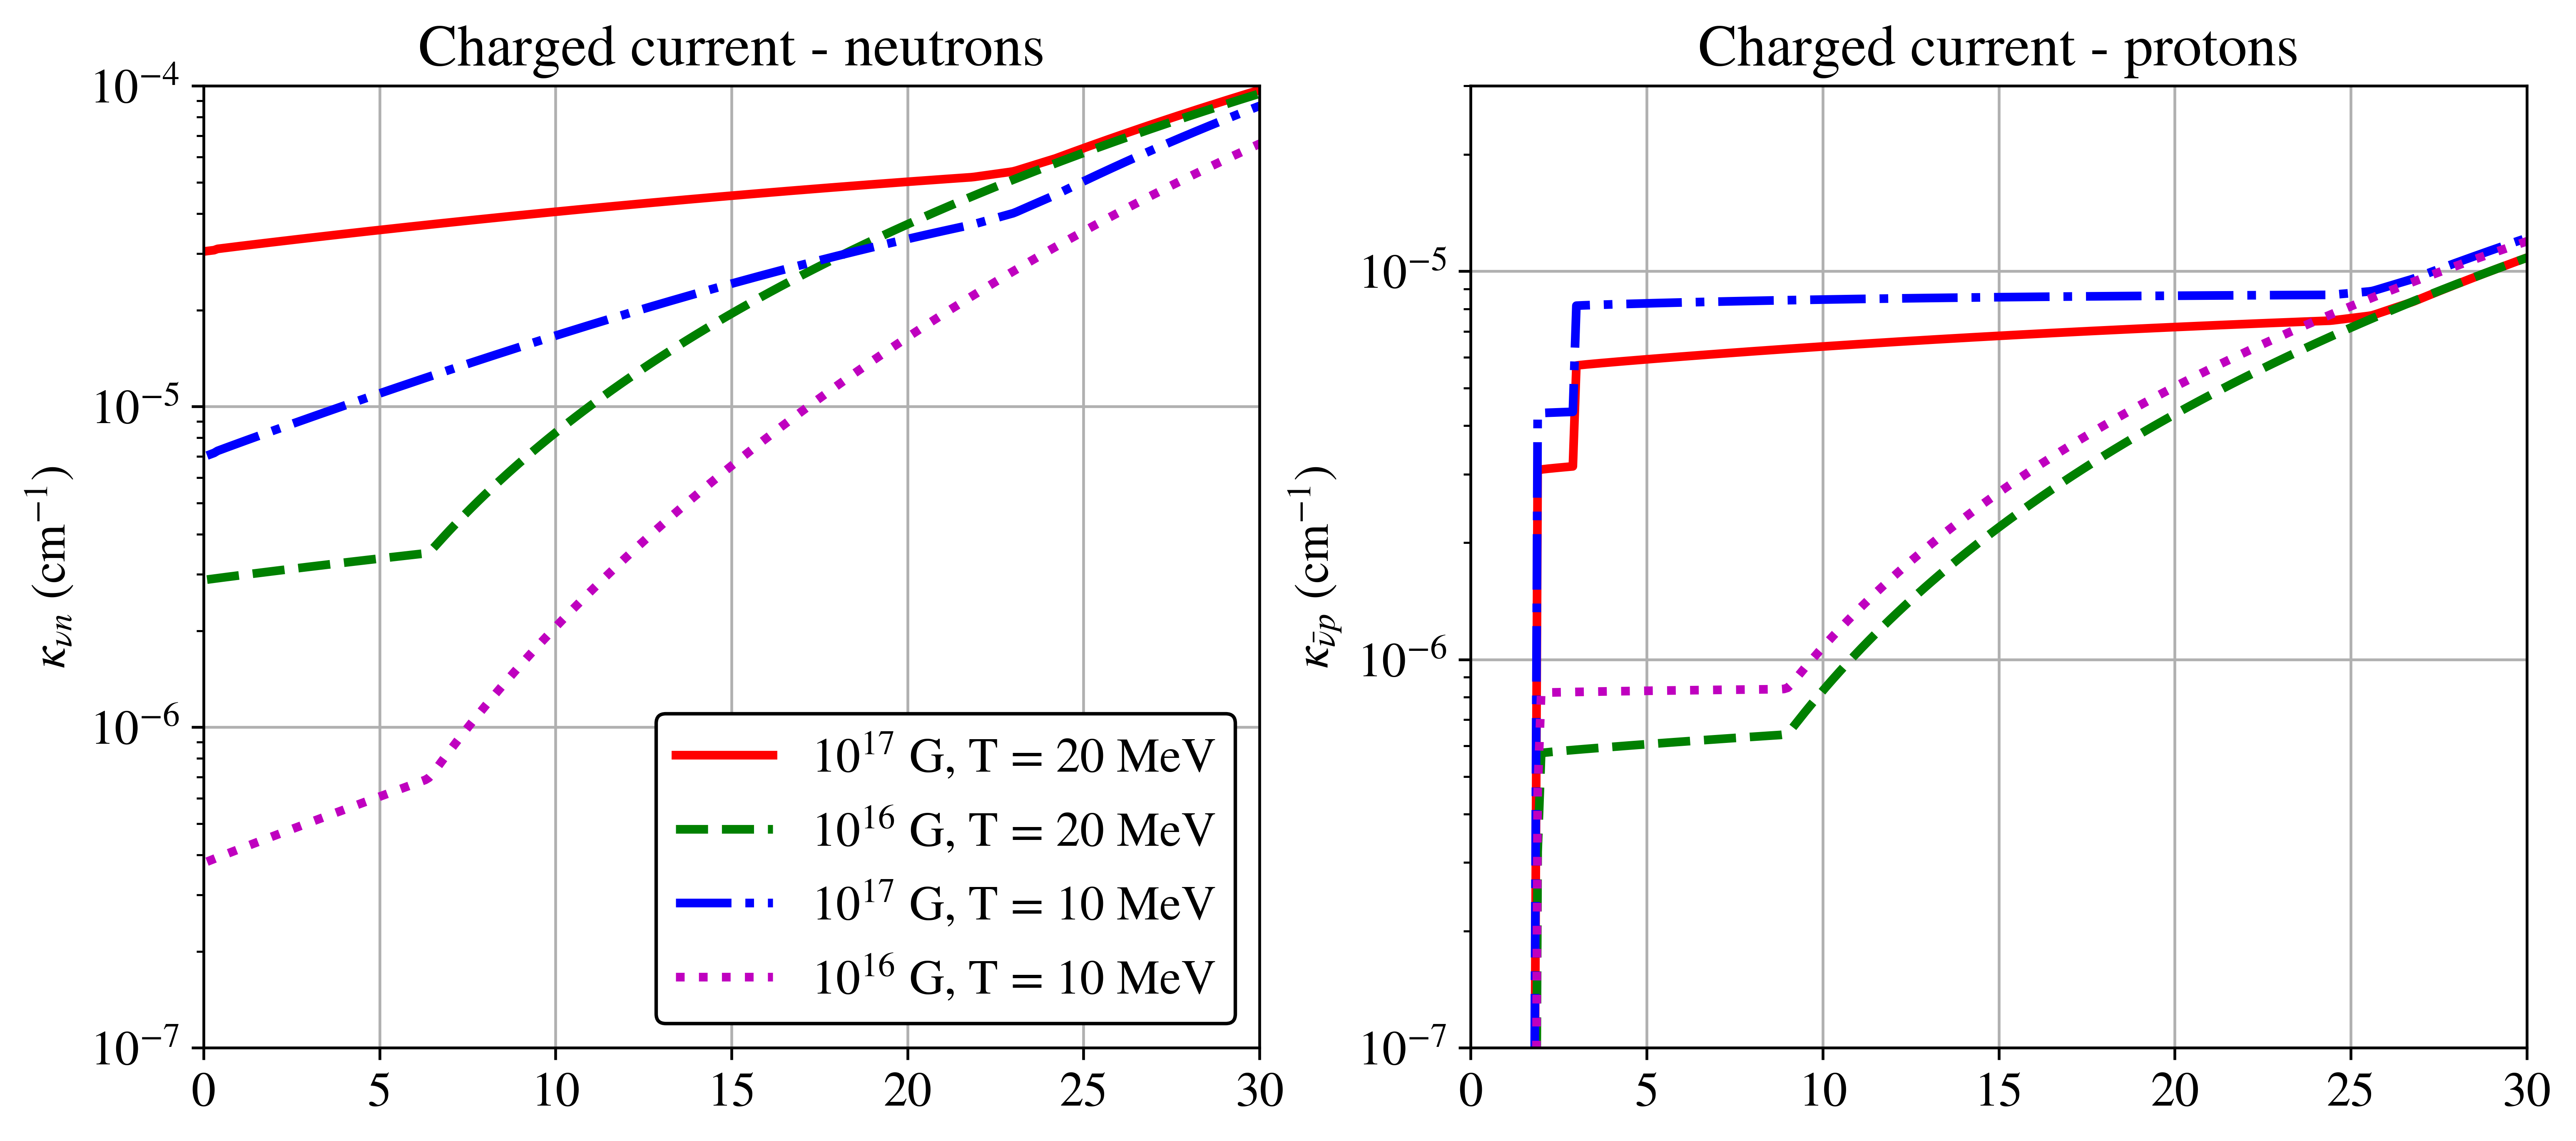

In [75]:
knu = linspace(0.1, 50, 500)
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

cc_plot_data = np.empty((500, 4))
with open('./opacity csvs/plotdatcc.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        cc_plot_data[ix, :] = CC_FACTOR * np.array([float(elt) for elt in row])

ax[0].plot(knu, cc_plot_data[:, 0], 'r-', knu, cc_plot_data[:, 2], 'g--')
ax[1].plot(knu, cc_plot_data[:, 1], 'r-', knu, cc_plot_data[:, 3], 'g--')

cc_plot_data = np.empty((500, 4))
with open('./opacity csvs/plotdatcc2.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        cc_plot_data[ix, :] = CC_FACTOR * np.array([float(elt) for elt in row])

ax[0].plot(knu, cc_plot_data[:, 0], 'b-.', knu, cc_plot_data[:, 2], 'm:')
ax[1].plot(knu, cc_plot_data[:, 1], 'b-.', knu, cc_plot_data[:, 3], 'm:')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

for ax_temp in ax:
    ax_temp.set_xlim([0, 30])
    ax_temp.set_ylabel('$k_\\nu$')
    ax_temp.grid(alpha = 1)

ax[0].set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
ax[0].set_title('Charged current - neutrons')
ax[1].set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')
ax[1].set_title('Charged current - protons')

ax[0].legend(['$10^{17}$ G, T = 20 MeV', '$10^{16}$ G, T = 20 MeV', '$10^{17}$ G, T = 10 MeV', '$10^{16}$ G, T = 10 MeV'])
ax[0].set_ylim([1e-7, 1e-4])
ax[1].set_ylim([1e-7, 3e-5])


In [76]:
10**-15 * GF**2 * HBARC / (6.2 * 10**5) * 10**39 * 3 * 10**23

1.9695977148864203e+31

In [36]:
angle_data = np.empty((199, 4))
with open('./opacity csvs/plotdatangles.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        angle_data[ix, :] = [float(elt) for elt in row]
        

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_268/538875961.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_\\nu$')
/tmp/ipykernel_268/538875961.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')


Text(0.5, 1.0, 'Anisotropies in scattering rates')

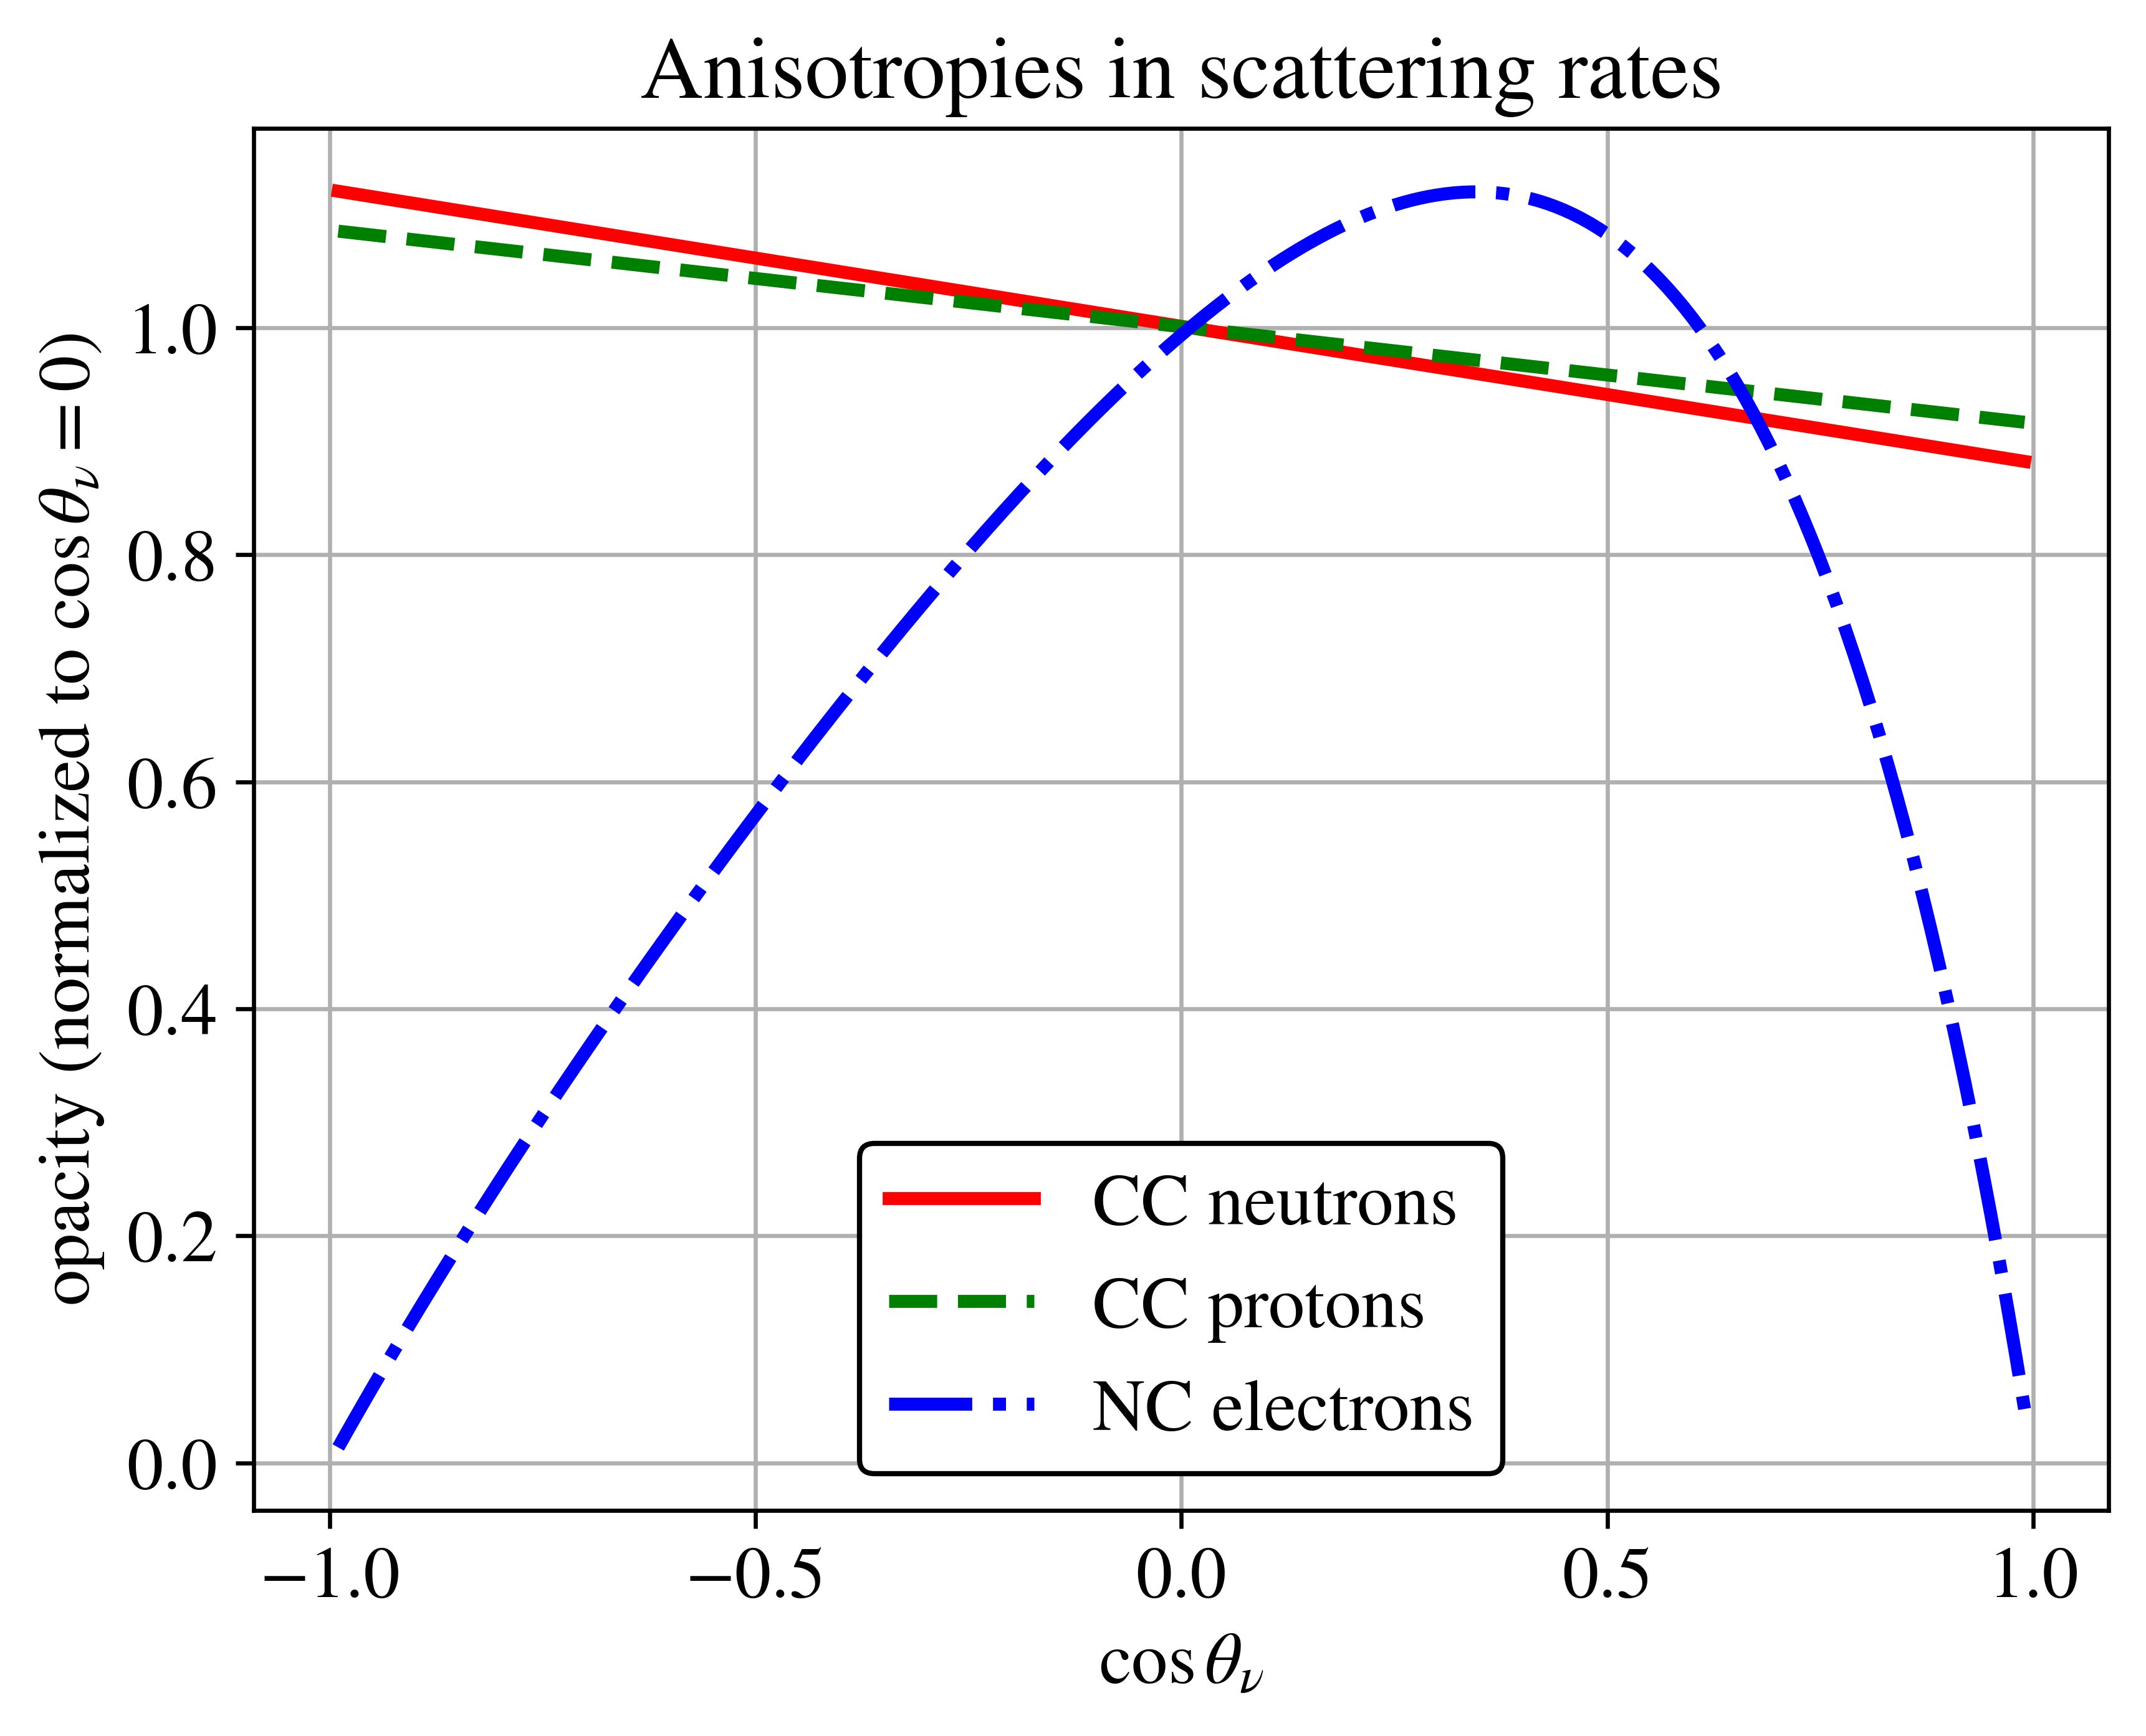

In [48]:
ct_space = linspace(-0.99, 0.99, 199)
plt.plot(ct_space, angle_data[:, 0] / angle_data[100, 0], 'r-', ct_space, angle_data[:, 1] / angle_data[100, 1], 'g--', 
    ct_space, angle_data[:, 3] / angle_data[100, 3], 'b-.')
plt.grid(True)
plt.legend(['CC neutrons', 'CC protons', 'NC electrons'])
plt.xlabel('$\cos \\theta_\\nu$')
plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')
plt.title('Anisotropies in scattering rates')

In [ ]:
dp = [0, 8, 0, 4, 5, 0]
p = [9, 9, 6, 9, 9, 9]
